# Dataset Analysis 
This workbook is used to visualise the distribution of features in the datasets used for the project.

## Imports

In [30]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Used for visualising categorical data 

## Wine Quality Datasets
This section covers the distribution and features within the wine quality datasets. It examines both the white and red wine sets.

In [32]:
df_red = pd.read_csv("Data/Raw/Wine_Datasets/UCI_Wines/winequality-red.csv", sep=';')
df_white = pd.read_csv("Data/Raw/Wine_Datasets/UCI_Wines/winequality-white.csv", sep=';')

In [85]:
def merge_wine_datasets(df_red, df_white, df_qt):
    # Create copies of the datasets and add wine type indicators
    df_red_copy = df_red.copy()
    df_white_copy = df_white.copy()
    df_qt_copy = df_qt.copy()

    # Add wine type column (one-hot encoding)
    df_red_copy['is_red_wine'] = 1
    df_white_copy['is_red_wine'] = 0
    df_qt_copy['is_red_wine'] = 1  # Assuming QT dataset is red wine

    # Merge the datasets
    df_merged = pd.concat([df_red_copy, df_white_copy, df_qt_copy], ignore_index=True)

    print(f"Merged dataset shape: {df_merged.shape}")
    print(f"Red wine samples: {len(df_red_copy)}")
    print(f"White wine samples: {len(df_white_copy)}")
    print(f"QT samples: {len(df_qt_copy)}")
    print(f"Total samples: {len(df_merged)}")

    return df_merged

df_red = pd.read_csv("Data/Raw/Wine_Datasets/UCI_Wines/winequality-red.csv", sep=';')
df_white = pd.read_csv("Data/Raw/Wine_Datasets/UCI_Wines/winequality-white.csv", sep=';')
df_qt = pd.read_csv("Data/Raw/Wine_Datasets/Kaggle/WineQT.csv", sep=',').drop(["Id"], axis=1)

# Prepare datasets in a dictionary for easy looping
datasets = {
    'Red Wine': df_red,
    'White Wine': df_white,
    'Quality Test': df_qt
}
df_merged_quality = merge_wine_datasets(df_red, df_white, df_qt)

Merged dataset shape: (7640, 13)
Red wine samples: 1599
White wine samples: 4898
QT samples: 1143
Total samples: 7640


Feature description. It is useful to view the columns contained within the dataset and the datatypes.

In [33]:
# Print data info 
print("Red Wine Dataset Info:")
print(df_red.info())

missing_red = df_red.isnull().sum() + df_red.isna().sum()
print("\nMissing values in Red Wine Dataset:")
print(missing_red)

Red Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Missing values in Red Wine Dataset:
fixed acidity           0
volatile acidity        0
citric ac

In [34]:
print("\nWhite Wine Dataset Info:")
print(df_white.info())

missing_white = df_white.isnull().sum() + df_white.isna().sum()
print("\nMissing values in White Wine Dataset:")
print(missing_white)


White Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None

Missing values in White Wine Dataset:
fixed acidity           0
volatile acidity        0
citr

### Describe and Visualise Datasets
We can visualise the count and distribution of datasets here. It is useful for removing outliers when processing the datasets later. 


Wine Quality Dataset Description:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    7640.000000       7640.000000  7640.000000     7640.000000   
mean        7.379247          0.368342     0.311113        5.007716   
std         1.427803          0.180411     0.155121        4.539029   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.500000          0.240000     0.240000        1.800000   
50%         7.100000          0.320000     0.300000        2.600000   
75%         7.900000          0.460000     0.400000        7.350000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  7640.000000          7640.000000           7640.000000  7640.000000   
mean      0.060657            28.294699            105.297513     0.995001   
std       0.038719            17.660597             59.142368     0.002954   
min       0.0

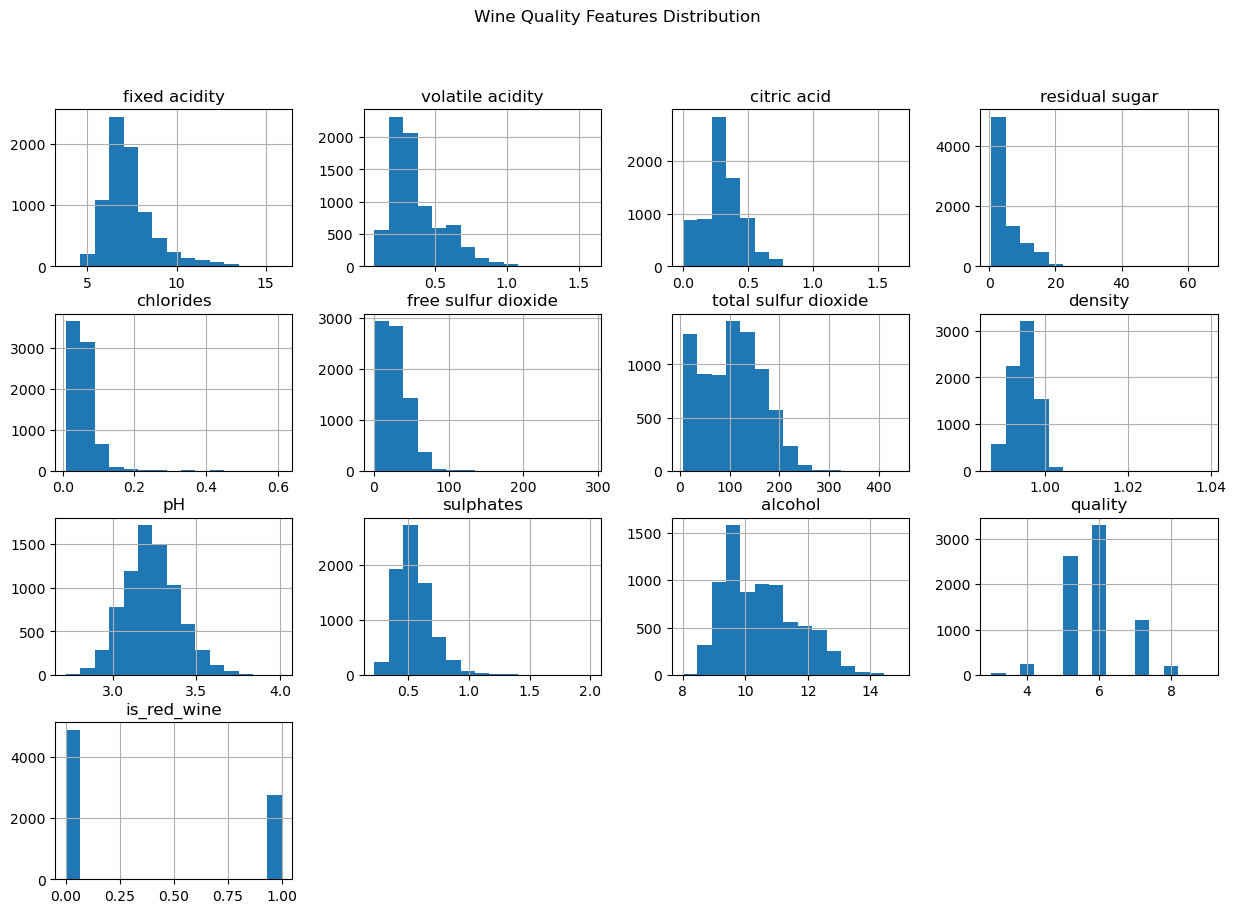


Wine Quality Class Distribution:
quality
6    3298
5    2621
7    1222
4     249
8     209
3      36
9       5
Name: count, dtype: int64


In [87]:
# Visualise Datasets 
# Histograms for each feature in red wine dataset
print("\nWine Quality Dataset Description:")
print(df_merged_quality.describe())
df_merged_quality.hist(bins=15, figsize=(15, 10))
plt.suptitle("Wine Quality Features Distribution")
plt.show()

# Print number of each class in quality column
print("\nWine Quality Class Distribution:")
print(df_merged_quality['quality'].value_counts())


# Plot just 


White Wine Dataset Description:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009

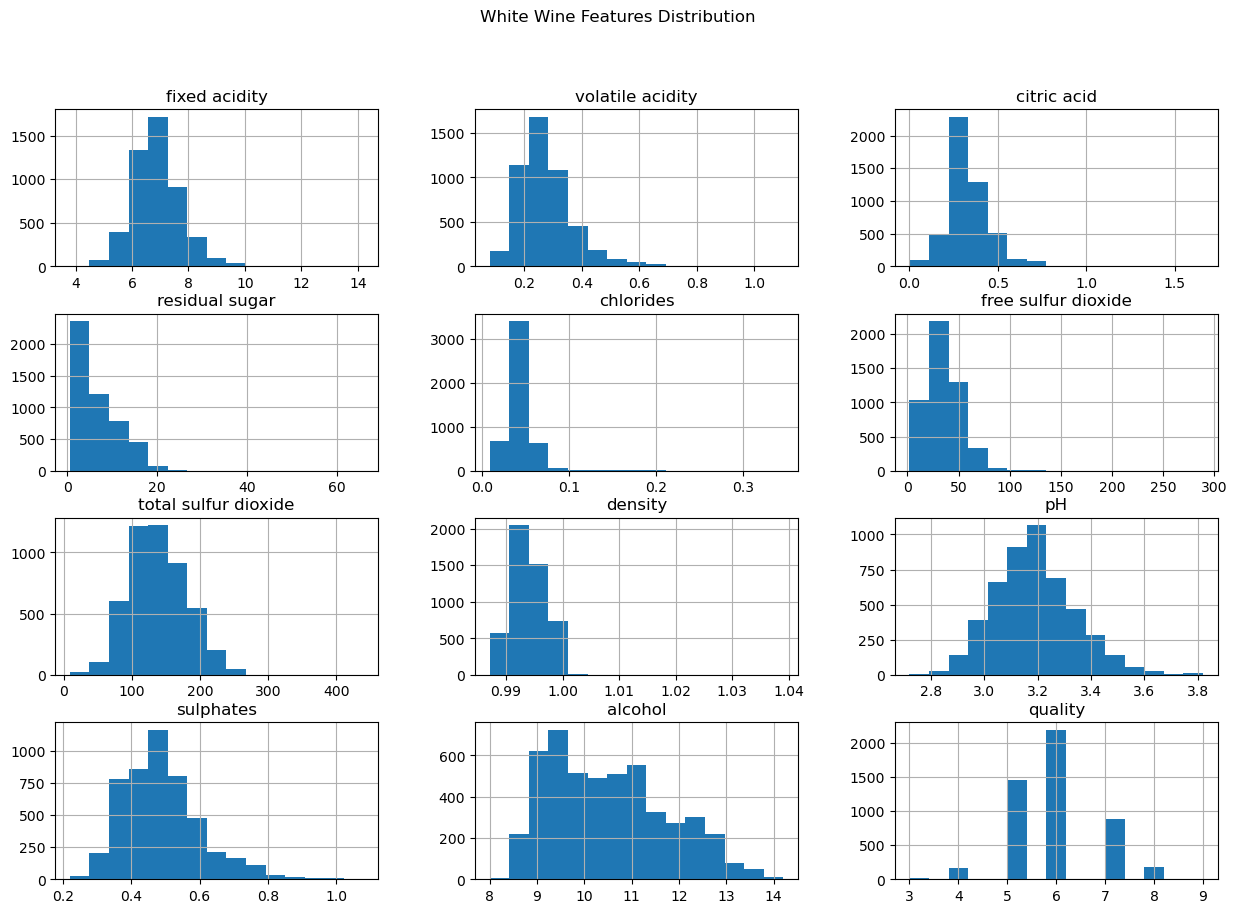

In [36]:
# Histograms for each feature in white wine dataset
print("\nWhite Wine Dataset Description:")
print(df_white.describe())
df_white.hist(bins=15, figsize=(15, 10))
plt.suptitle("White Wine Features Distribution")
plt.show()

## Wine Cost Datasets
This section covers the wine cost dataset. 

In [37]:
# Load datasets
df_red_cost = pd.read_csv("Data/Raw/Wine_Datasets/Kaggle/Red.csv")
df_white_cost = pd.read_csv("Data/Raw/Wine_Datasets/Kaggle/White.csv")
df_rose_cost = pd.read_csv("Data/Raw/Wine_Datasets/Kaggle/Rose.csv")
df_sparkling_cost = pd.read_csv("Data/Raw/Wine_Datasets/Kaggle/Sparkling.csv")

In [38]:
# Print data info 
print("Red Wine Dataset Info:")
print(df_red_cost.info())

Red Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     8666 non-null   object 
 1   Country  8666 non-null   object 
 2   Region   8666 non-null   object 
 3   Winery   8666 non-null   object 
 4   Rating   8666 non-null   float64
 5   Price    8666 non-null   float64
 6   Year     8666 non-null   object 
dtypes: float64(2), object(5)
memory usage: 474.1+ KB
None


In [39]:
# Print white wine dataset info
print("\nWhite Wine Dataset Info:")
print(df_white_cost.info())


White Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3764 entries, 0 to 3763
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     3764 non-null   object 
 1   Country  3764 non-null   object 
 2   Region   3764 non-null   object 
 3   Winery   3764 non-null   object 
 4   Rating   3764 non-null   float64
 5   Price    3764 non-null   float64
 6   Year     3764 non-null   object 
dtypes: float64(2), object(5)
memory usage: 206.0+ KB
None


In [40]:
# Print rose wine dataset info
print("\nRose Wine Dataset Info:")
print(df_rose_cost.info())


Rose Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     397 non-null    object 
 1   Country  397 non-null    object 
 2   Region   397 non-null    object 
 3   Winery   397 non-null    object 
 4   Rating   397 non-null    float64
 5   Price    397 non-null    float64
 6   Year     397 non-null    object 
dtypes: float64(2), object(5)
memory usage: 21.8+ KB
None


In [41]:
# Print sparkling wine dataset info
print("\nSparkling Wine Dataset Info:")
print(df_sparkling_cost.info())


Sparkling Wine Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     1007 non-null   object 
 1   Country  1007 non-null   object 
 2   Region   1007 non-null   object 
 3   Winery   1007 non-null   object 
 4   Rating   1007 non-null   float64
 5   Price    1007 non-null   float64
 6   Year     1007 non-null   object 
dtypes: float64(2), object(5)
memory usage: 55.2+ KB
None


### Merged Wine Costs

In [ ]:
# Merge all wine cost datasets with one-hot encoding for wine types
print("=== Merging Wine Cost Datasets ===\n")

# Create copies and add wine type indicators
df_red_cost_copy = df_red_cost.copy()
df_white_cost_copy = df_white_cost.copy()
df_rose_cost_copy = df_rose_cost.copy()
df_sparkling_cost_copy = df_sparkling_cost.copy()

# Add one-hot encoded wine type columns
df_red_cost_copy['is_red_wine'] = 1
df_red_cost_copy['is_white_wine'] = 0
df_red_cost_copy['is_rose_wine'] = 0

df_white_cost_copy['is_red_wine'] = 0
df_white_cost_copy['is_white_wine'] = 1
df_white_cost_copy['is_rose_wine'] = 0

df_rose_cost_copy['is_red_wine'] = 0
df_rose_cost_copy['is_white_wine'] = 0
df_rose_cost_copy['is_rose_wine'] = 1

df_sparkling_cost_copy['is_red_wine'] = 0
df_sparkling_cost_copy['is_white_wine'] = 0
df_sparkling_cost_copy['is_rose_wine'] = 0

# Merge all datasets
df_merged_cost = pd.concat([
    df_red_cost_copy, 
    df_white_cost_copy, 
    df_rose_cost_copy, 
    df_sparkling_cost_copy
], ignore_index=True)

print("Dataset merging complete!")
print(f"Red wine samples: {len(df_red_cost_copy):,}")
print(f"White wine samples: {len(df_white_cost_copy):,}")
print(f"Rose wine samples: {len(df_rose_cost_copy):,}")
print(f"Sparkling wine samples: {len(df_sparkling_cost_copy):,}")
print(f"Total merged samples: {len(df_merged_cost):,}")

print(f"\nMerged dataset shape: {df_merged_cost.shape}")
print(f"Columns: {list(df_merged_cost.columns)}")

# Verify one-hot encoding
print(f"\nWine type distribution verification:")
print(f"Red wines: {df_merged_cost['is_red_wine'].sum():,}")
print(f"White wines: {df_merged_cost['is_white_wine'].sum():,}")
print(f"Rose wines: {df_merged_cost['is_rose_wine'].sum():,}")

# Check for any missing values in the merged dataset
print(f"\nMissing values in merged dataset:")
missing_values = df_merged_cost.isnull().sum()
print(missing_values[missing_values > 0])

# Save merged dataset
import os
os.makedirs("Data/Processed", exist_ok=True)
df_merged_cost.to_csv("Data/Processed/merged_wine_cost_data.csv", index=False)
print(f"\nMerged dataset saved to 'Data/Processed/merged_wine_cost_data.csv'")

=== Merging Wine Cost Datasets ===

Dataset merging complete!
Red wine samples: 8,666
White wine samples: 3,764
Rose wine samples: 397
Sparkling wine samples: 1,007
Total merged samples: 13,834

Merged dataset shape: (13834, 10)
Columns: ['Name', 'Country', 'Region', 'Winery', 'Rating', 'Price', 'Year', 'is_red_wine', 'is_white_wine', 'is_rose_wine']

Wine type distribution verification:
Red wines: 8,666
White wines: 3,764
Rose wines: 397

Missing values in merged dataset:
Series([], dtype: int64)

✅ Merged dataset saved to 'Data/Processed/merged_wine_cost_data.csv'


In [94]:
# Show min/max for numerical cols 
numerical_cols = ["Rating", "Year", "Price"]
for col in numerical_cols: 
    print(col)
    if col=="Year": 
        min_year = df_merged_cost.query(f"{col} != 0")[col].min()
        print(f"Min: {min_year}")
    else: 
        print(f"Min: {df_merged_cost[col].min()}")
    print(f"Max: {df_merged_cost[col].max()}")

print("Target Variable 'Price' Distribution:")
print(df_merged_cost['Price'].describe())

Rating
Min: 2.2
Max: 4.9
Year
Min: 1961
Max: 2020
Price
Min: 3.15
Max: 3410.79
Target Variable 'Price' Distribution:
count    13834.000000
mean        33.024850
std         70.899893
min          3.150000
25%          9.902500
50%         15.950000
75%         32.500000
max       3410.790000
Name: Price, dtype: float64


In [43]:
# Check for any missing values in the merged cost data set 
for column in df_merged_cost.columns:
    missing_count = df_merged_cost[column].isnull().sum()
    if missing_count > 0:
        print(f"Column '{column}' has {missing_count} missing values.")

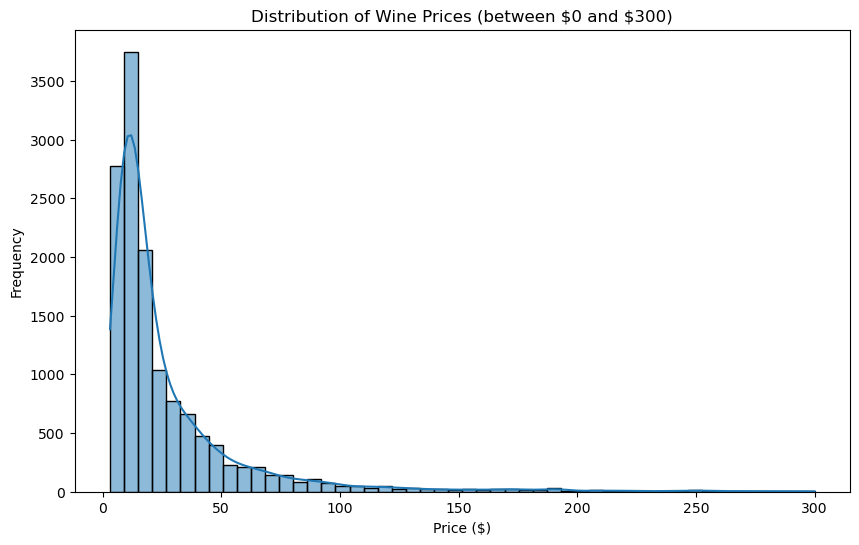


Wine Price Distribution Statistics:
Mean: 33.02
Median: 15.95
Standard Deviation: 70.90
Minimum: 3.15
Maximum: 3410.79


In [44]:
# Visualise distribution of wine prices from 0 to 300 dollars
prices = df_merged_cost['Price']

plt.figure(figsize=(10, 6))
sns.histplot(prices[prices <= 300], bins=50, kde=True)
plt.title("Distribution of Wine Prices (between \\$0 and \\$300)")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

# Also print price distribution statistics
print("\nWine Price Distribution Statistics:")
print(f"Mean: {prices.mean():.2f}")
print(f"Median: {prices.median():.2f}")
print(f"Standard Deviation: {prices.std():.2f}")
print(f"Minimum: {prices.min():.2f}")
print(f"Maximum: {prices.max():.2f}")

In [ ]:
# Clean Year column - Replace N.V values with 0
print("=== Cleaning Year Column - Replacing N.V values with 0 ===\n")

# List of datasets to clean
datasets_to_clean = {
    'df_red_cost': df_red_cost,
    'df_white_cost': df_white_cost,
    'df_rose_cost': df_rose_cost,
    'df_sparkling_cost': df_sparkling_cost,
    'df_merged_cost': df_merged_cost
}

# Clean each dataset
for dataset_name, dataset in datasets_to_clean.items():
    if 'Year' in dataset.columns:
        # Check for N.V values before cleaning
        nv_count_before = (dataset['Year'] == 'N.V.').sum()
        null_count_before = dataset['Year'].isnull().sum()
        nan_count_before = np.isnan(dataset['Year']).sum() if dataset['Year'].dtype == float else 0
        
        print(f"{dataset_name}:")
        print(f"  N.V. values found: {nv_count_before}")
        print(f"  Null values found: {null_count_before}")
        print(f"  NaN values found: {nan_count_before}")
        
        # Replace N.V. with 0
        dataset['Year'] = dataset['Year'].replace('N.V.', 0)
        
        # Also handle any variations of N.V
        dataset['Year'] = dataset['Year'].replace(['N.V', 'NV', 'n.v.', 'n.v', 'nv'], 0)
        
        # Convert Year column to numeric, handling any remaining non-numeric values
        dataset['Year'] = pd.to_numeric(dataset['Year'], errors='coerce')
        
        # Replace any NaN values (from failed conversions) with 0
        dataset['Year'] = dataset['Year'].fillna(0)
        
        # Convert to integer
        dataset['Year'] = dataset['Year'].astype(int)
        
        # Check results after cleaning
        nv_count_after = (dataset['Year'] == 0).sum()
        
        print(f"  After cleaning - Zero values: {nv_count_after}")
        print(f"  Year range: {dataset['Year'].min()} to {dataset['Year'].max()}")
        print(f"  Data type: {dataset['Year'].dtype}")
        print()
    else:
        print(f"{dataset_name}: No 'Year' column found")
        print()

# Verify the cleaned merged dataset
print("=== Verification of Merged Dataset ===")
print(f"Year column statistics for merged dataset:")
print(f"  Total samples: {len(df_merged_cost)}")
print(f"  Zero values (cleaned N.V.): {(df_merged_cost['Year'] == 0).sum()}")
print(f"  Valid year values: {(df_merged_cost['Year'] > 0).sum()}")
print(f"  Year range: {df_merged_cost['Year'].min()} to {df_merged_cost['Year'].max()}")
print(f"  Unique years (first 20): {sorted(df_merged_cost['Year'].unique())[:20]}")

# Save the cleaned merged dataset
df_merged_cost.to_csv("Data/Processed/merged_wine_cost_data.csv", index=False)
print(f"\nCleaned merged dataset saved to 'Data/Processed/merged_wine_cost_data.csv'")

=== Cleaning Year Column - Replacing N.V values with 0 ===

df_red_cost:
  N.V. values found: 8
  Null values found: 0
  NaN values found: 0
  After cleaning - Zero values: 8
  Year range: 0 to 2019
  Data type: int64

df_white_cost:
  N.V. values found: 5
  Null values found: 0
  NaN values found: 0
  After cleaning - Zero values: 5
  Year range: 0 to 2020
  Data type: int64

df_rose_cost:
  N.V. values found: 3
  Null values found: 0
  NaN values found: 0
  After cleaning - Zero values: 3
  Year range: 0 to 2019
  Data type: int64

df_sparkling_cost:
  N.V. values found: 728
  Null values found: 0
  NaN values found: 0
  After cleaning - Zero values: 728
  Year range: 0 to 2019
  Data type: int64

df_merged_cost:
  N.V. values found: 744
  Null values found: 0
  NaN values found: 0
  After cleaning - Zero values: 744
  Year range: 0 to 2020
  Data type: int64

=== Verification of Merged Dataset ===
Year column statistics for merged dataset:
  Total samples: 13834
  Zero values (clean

### Red Categorical Data Visualization
Now let's create visualizations specifically for the object-type (categorical) variables in our wine datasets.

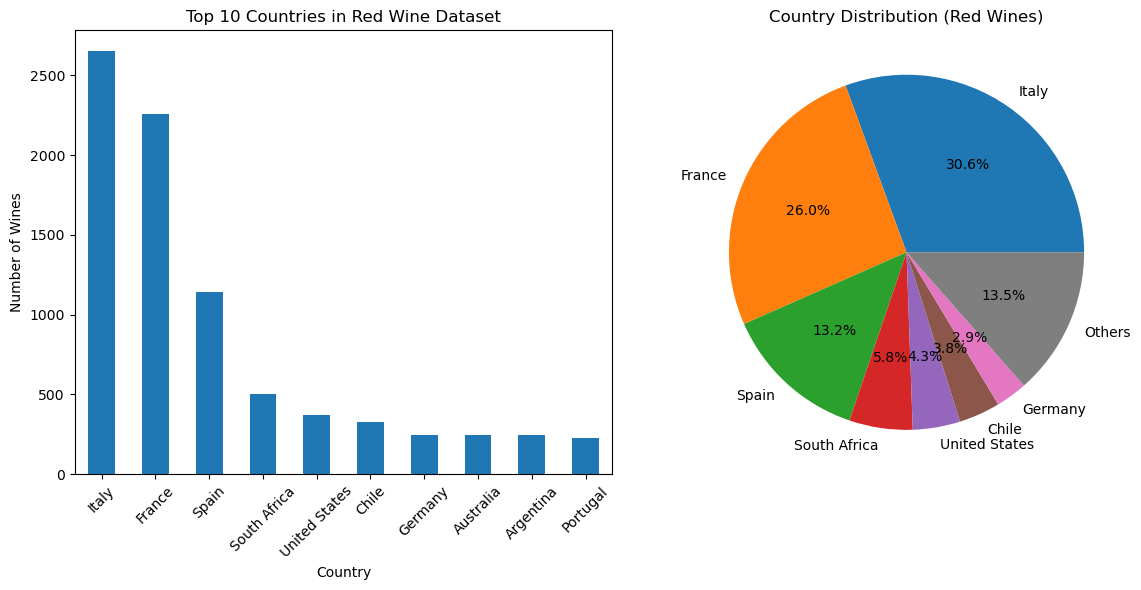

In [46]:
# Country Distribution - Bar Chart
plt.figure(figsize=(12, 6))
country_counts = df_red_cost['Country'].value_counts()
plt.subplot(1, 2, 1)
country_counts.head(10).plot(kind='bar')
plt.title('Top 10 Countries in Red Wine Dataset')
plt.xlabel('Country')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)

# Country Distribution - Pie Chart (top 8 + others)
plt.subplot(1, 2, 2)
top_countries = country_counts.head(7)
others = pd.Series([country_counts.tail(-7).sum()], index=['Others'])
pie_data = pd.concat([top_countries, others])
plt.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%')
plt.title('Country Distribution (Red Wines)')
plt.tight_layout()
plt.show()

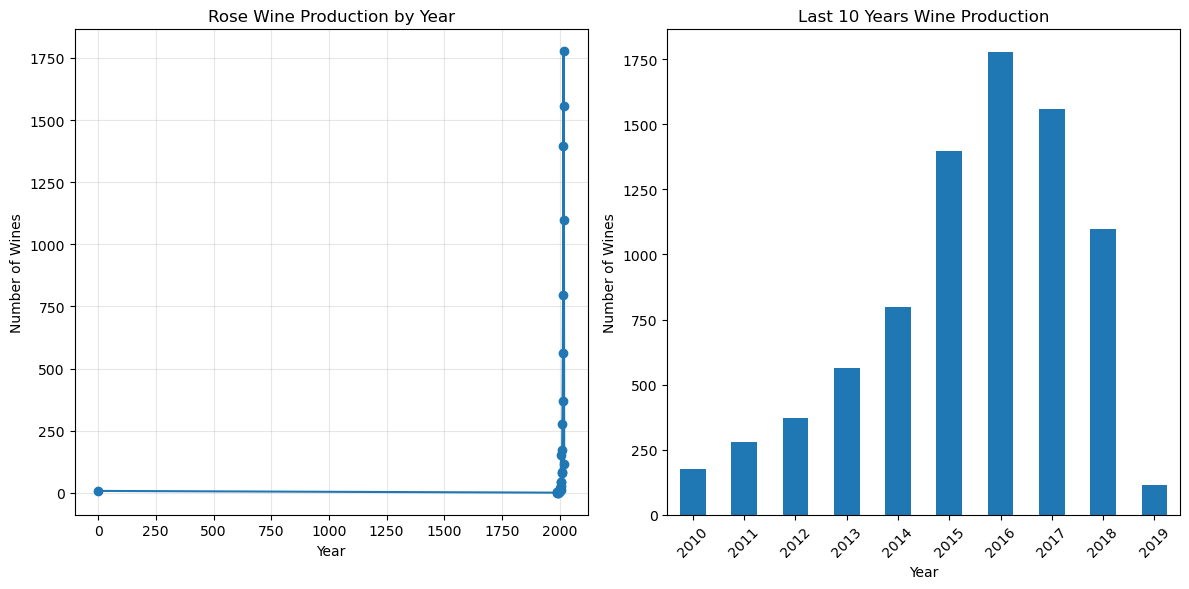

In [47]:
# Vintage Year Distribution
plt.figure(figsize=(12, 6))
year_counts = df_red_cost['Year'].value_counts().sort_index()

plt.subplot(1, 2, 1)
year_counts.plot(kind='line', marker='o')
plt.title('Rose Wine Production by Year')
plt.xlabel('Year')
plt.ylabel('Number of Wines')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
year_counts.tail(10).plot(kind='bar')
plt.title('Last 10 Years Wine Production')
plt.xlabel('Year')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

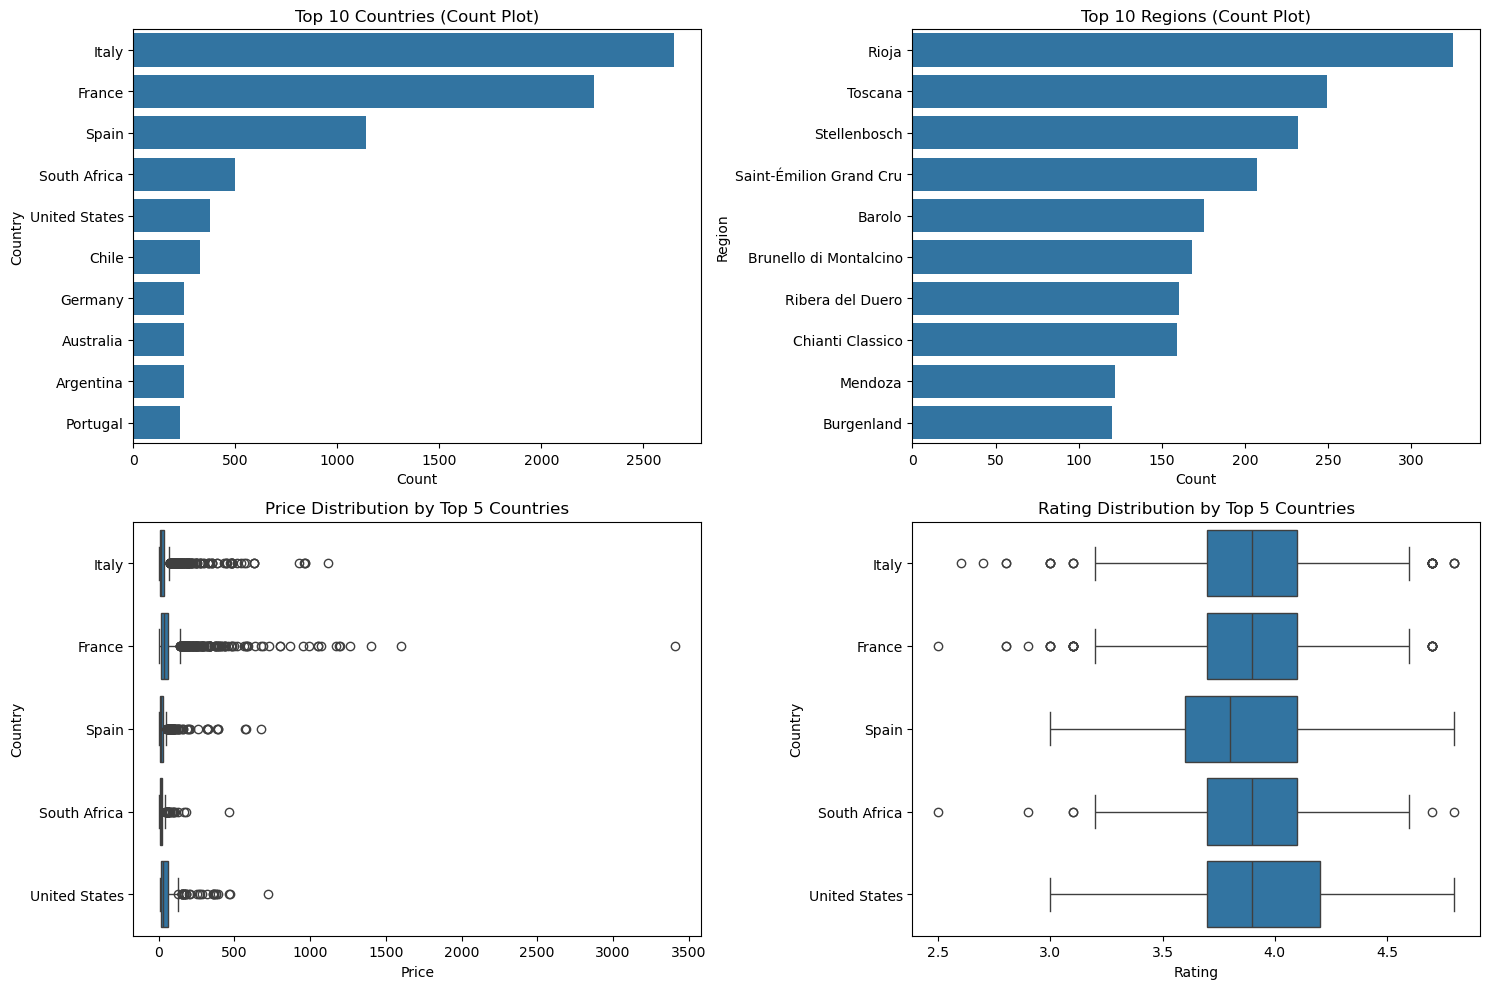

In [48]:
# Using Seaborn for better categorical visualizations
plt.figure(figsize=(15, 10))

# Count plot for countries
plt.subplot(2, 2, 1)
sns.countplot(data=df_red_cost, y='Country', order=df_red_cost['Country'].value_counts().head(10).index)
plt.title('Top 10 Countries (Count Plot)')
plt.xlabel('Count')

# Count plot for regions (top 10)
plt.subplot(2, 2, 2)
top_regions = df_red_cost['Region'].value_counts().head(10).index
sns.countplot(data=df_red_cost[df_red_cost['Region'].isin(top_regions)], y='Region', 
              order=top_regions)
plt.title('Top 10 Regions (Count Plot)')
plt.xlabel('Count')

# Box plot: Price by Country (top 5 countries)
plt.subplot(2, 2, 3)
top_5_countries = df_red_cost['Country'].value_counts().head(5).index
sns.boxplot(data=df_red_cost[df_red_cost['Country'].isin(top_5_countries)], 
            y='Country', x='Price', order=top_5_countries)
plt.title('Price Distribution by Top 5 Countries')

# Box plot: Rating by Country (top 5 countries)
plt.subplot(2, 2, 4)
sns.boxplot(data=df_red_cost[df_red_cost['Country'].isin(top_5_countries)], 
            y='Country', x='Rating', order=top_5_countries)
plt.title('Rating Distribution by Top 5 Countries')

plt.tight_layout()
plt.show()

In [50]:
# Summary statistics for categorical variables
print("=== CATEGORICAL VARIABLE SUMMARY ===\n")

print("Country Distribution:")
print(df_red_cost['Country'].value_counts().head(10))
print(f"Total unique countries: {df_red_cost['Country'].nunique()}")

print("\nRegion Distribution:")
print(df_red_cost['Region'].value_counts().head(10))
print(f"Total unique regions: {df_red_cost['Region'].nunique()}")

print("\nWinery Distribution:")
print(df_red_cost['Winery'].value_counts().head(10))
print(f"Total unique wineries: {df_red_cost['Winery'].nunique()}")

print("\nYear Distribution:")
print(df_red_cost['Year'].value_counts().sort_index().tail(10))
print(f"Year range: {df_red_cost['Year'].min()} - {df_red_cost['Year'].max()}")

# Check for missing values in categorical columns
print("\nMissing Values in Categorical Columns:")
categorical_cols = ['Name', 'Country', 'Region', 'Winery', 'Year']
for col in categorical_cols:
    missing = df_rose_cost[col].isnull().sum()
    print(f"{col}: {missing} missing values ({missing/len(df_rose_cost)*100:.1f}%)")

=== CATEGORICAL VARIABLE SUMMARY ===

Country Distribution:
Country
Italy            2650
France           2256
Spain            1142
South Africa      500
United States     374
Chile             326
Germany           248
Australia         246
Argentina         246
Portugal          230
Name: count, dtype: int64
Total unique countries: 30

Region Distribution:
Region
Rioja                      325
Toscana                    249
Stellenbosch               232
Saint-Émilion Grand Cru    207
Barolo                     175
Brunello di Montalcino     168
Ribera del Duero           160
Chianti Classico           159
Mendoza                    122
Burgenland                 120
Name: count, dtype: int64
Total unique regions: 624

Winery Distribution:
Winery
Errazuriz                 40
Gaja                      32
Château de Saint Cosme    32
Torres                    31
M. Chapoutier             31
Joseph Drouhin            28
Delas                     27
Paul Jaboulet Aîné        26
Penfold

### White Categorical Data Visualization
Now let's create visualizations specifically for the object-type (categorical) variables in our wine datasets.

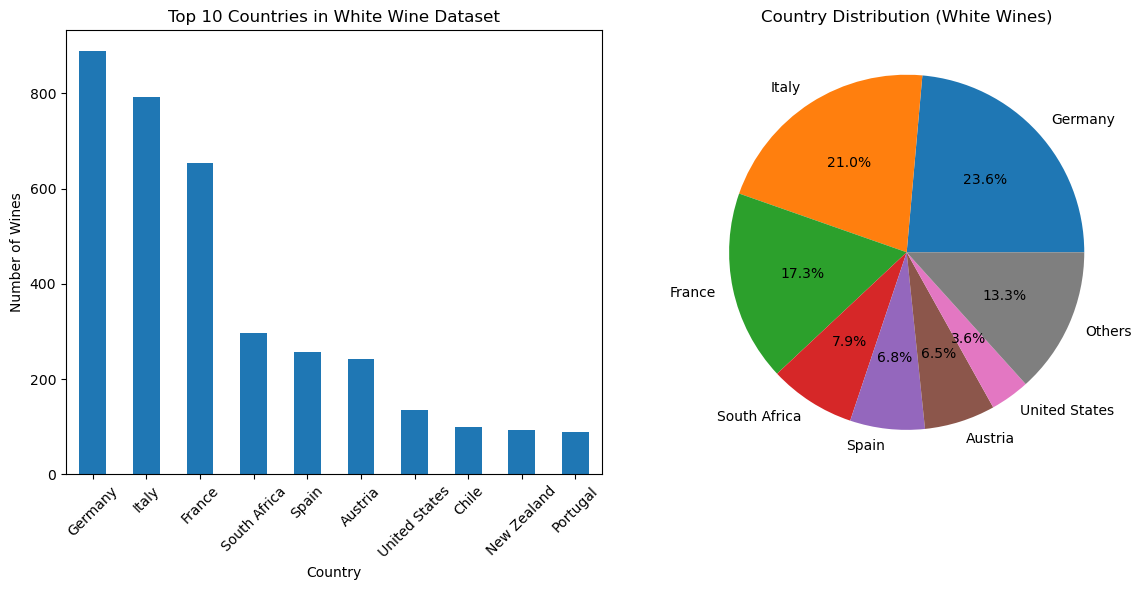

In [51]:
# 1. Country Distribution - Bar Chart
plt.figure(figsize=(12, 6))
country_counts = df_white_cost['Country'].value_counts()
plt.subplot(1, 2, 1)
country_counts.head(10).plot(kind='bar')
plt.title('Top 10 Countries in White Wine Dataset')
plt.xlabel('Country')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)

# 2. Country Distribution - Pie Chart (top 8 + others)
plt.subplot(1, 2, 2)
top_countries = country_counts.head(7)
others = pd.Series([country_counts.tail(-7).sum()], index=['Others'])
pie_data = pd.concat([top_countries, others])
plt.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%')
plt.title('Country Distribution (White Wines)')
plt.tight_layout()
plt.show()

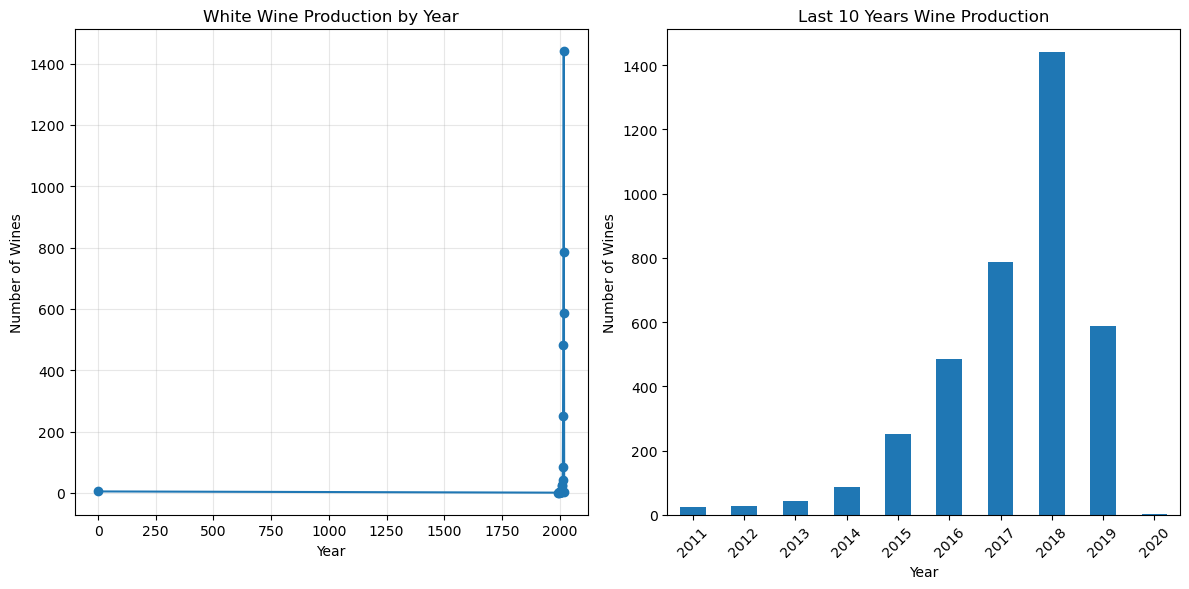

In [52]:
# 3. Vintage Year Distribution
plt.figure(figsize=(12, 6))
year_counts = df_white_cost['Year'].value_counts().sort_index()

plt.subplot(1, 2, 1)
year_counts.plot(kind='line', marker='o')
plt.title('White Wine Production by Year')
plt.xlabel('Year')
plt.ylabel('Number of Wines')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
year_counts.tail(10).plot(kind='bar')
plt.title('Last 10 Years Wine Production')
plt.xlabel('Year')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

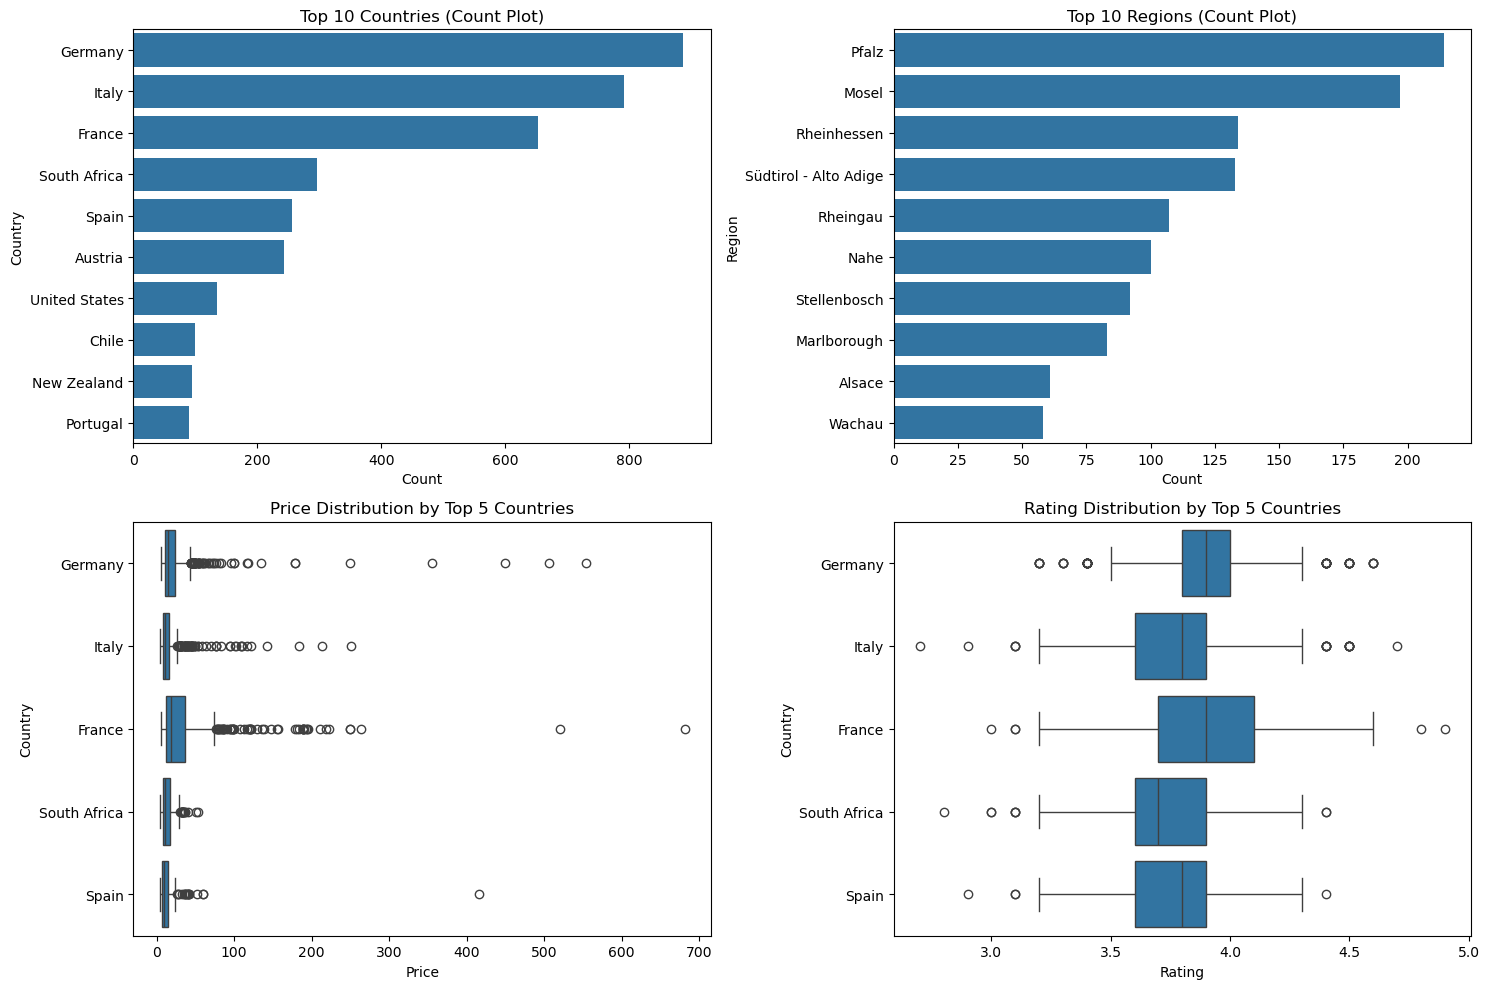

In [53]:
# 4. Using Seaborn for better categorical visualizations
plt.figure(figsize=(15, 10))

# Count plot for countries
plt.subplot(2, 2, 1)
sns.countplot(data=df_white_cost, y='Country', order=df_white_cost['Country'].value_counts().head(10).index)
plt.title('Top 10 Countries (Count Plot)')
plt.xlabel('Count')

# Count plot for regions (top 10)
plt.subplot(2, 2, 2)
top_regions = df_white_cost['Region'].value_counts().head(10).index
sns.countplot(data=df_white_cost[df_white_cost['Region'].isin(top_regions)], y='Region', 
              order=top_regions)
plt.title('Top 10 Regions (Count Plot)')
plt.xlabel('Count')

# Box plot: Price by Country (top 5 countries)
plt.subplot(2, 2, 3)
top_5_countries = df_white_cost['Country'].value_counts().head(5).index
sns.boxplot(data=df_white_cost[df_white_cost['Country'].isin(top_5_countries)], 
            y='Country', x='Price', order=top_5_countries)
plt.title('Price Distribution by Top 5 Countries')

# Box plot: Rating by Country (top 5 countries)
plt.subplot(2, 2, 4)
sns.boxplot(data=df_white_cost[df_white_cost['Country'].isin(top_5_countries)], 
            y='Country', x='Rating', order=top_5_countries)
plt.title('Rating Distribution by Top 5 Countries')

plt.tight_layout()
plt.show()

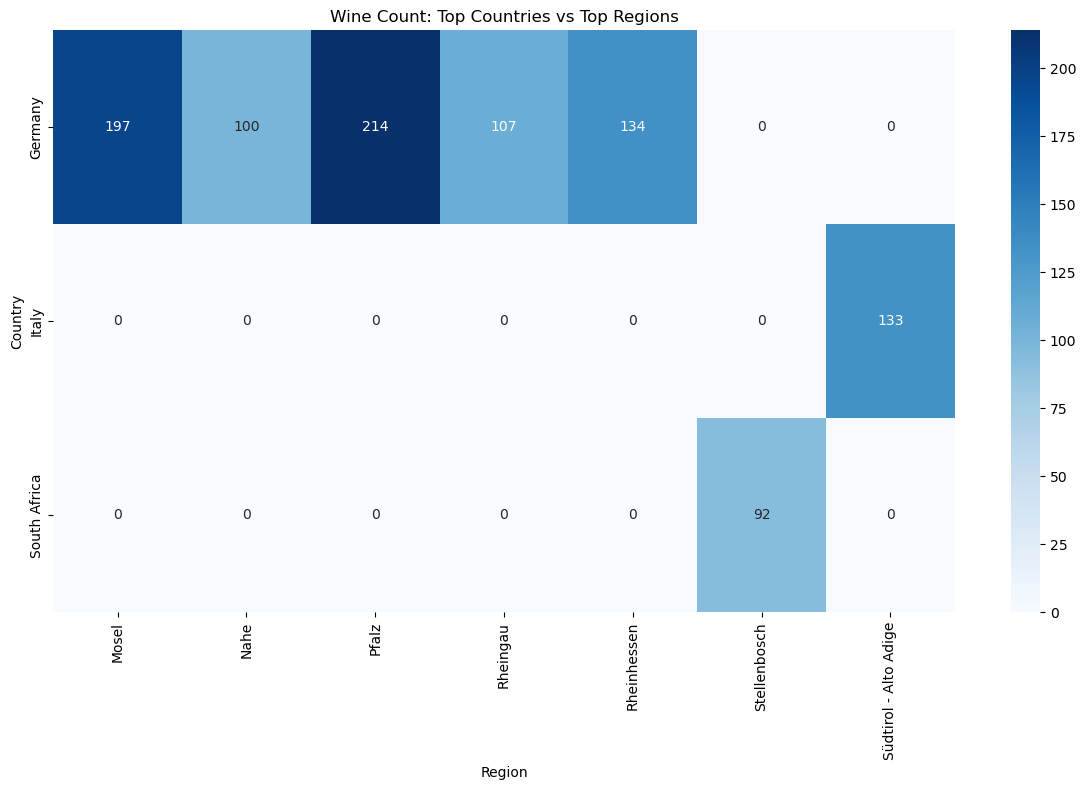

In [54]:
# 5. Relationship between categorical variables - Heatmap
plt.figure(figsize=(12, 8))

# Create a crosstab between Country and Region (top countries and regions only)
top_countries = df_white_cost['Country'].value_counts().head(5).index
top_regions = df_white_cost['Region'].value_counts().head(8).index

# Filter data for top countries and regions
filtered_data = df_white_cost[
    (df_white_cost['Country'].isin(top_countries)) & 
    (df_white_cost['Region'].isin(top_regions))
]

if not filtered_data.empty:
    crosstab = pd.crosstab(filtered_data['Country'], filtered_data['Region'])
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
    plt.title('Wine Count: Top Countries vs Top Regions')
    plt.xlabel('Region')
    plt.ylabel('Country')
else:
    print("No overlapping data between top countries and regions")

plt.tight_layout()
plt.show()

In [55]:
# 7. Summary statistics for categorical variables
print("=== CATEGORICAL VARIABLE SUMMARY ===\n")

print("Country Distribution:")
print(df_white_cost['Country'].value_counts().head(10))
print(f"Total unique countries: {df_white_cost['Country'].nunique()}")

print("\nRegion Distribution:")
print(df_white_cost['Region'].value_counts().head(10))
print(f"Total unique regions: {df_white_cost['Region'].nunique()}")

print("\nWinery Distribution:")
print(df_white_cost['Winery'].value_counts().head(10))
print(f"Total unique wineries: {df_white_cost['Winery'].nunique()}")

print("\nYear Distribution:")
print(df_white_cost['Year'].value_counts().sort_index().tail(10))
print(f"Year range: {df_white_cost['Year'].min()} - {df_white_cost['Year'].max()}")

# Check for missing values in categorical columns
print("\nMissing Values in Categorical Columns:")
categorical_cols = ['Name', 'Country', 'Region', 'Winery', 'Year']
for col in categorical_cols:
    missing = df_white_cost[col].isnull().sum()
    print(f"{col}: {missing} missing values ({missing/len(df_white_cost)*100:.1f}%)")

=== CATEGORICAL VARIABLE SUMMARY ===

Country Distribution:
Country
Germany          888
Italy            792
France           653
South Africa     296
Spain            256
Austria          243
United States    135
Chile             99
New Zealand       94
Portugal          89
Name: count, dtype: int64
Total unique countries: 30

Region Distribution:
Region
Pfalz                    214
Mosel                    197
Rheinhessen              134
Südtirol - Alto Adige    133
Rheingau                 107
Nahe                     100
Stellenbosch              92
Marlborough               83
Alsace                    61
Wachau                    58
Name: count, dtype: int64
Total unique regions: 457

Winery Distribution:
Winery
Markus Molitor       61
Von Winning          34
Wittmann             29
Joseph Drouhin       23
Emrich-Schönleber    23
Van Volxem           21
Schloss Lieser       19
Gut Hermannsberg     19
Torres               18
Dönnhoff             18
Name: count, dtype: int64
Tot

### Rose Categorical Data Visualization
Now let's create visualizations specifically for the object-type (categorical) variables in our wine datasets.

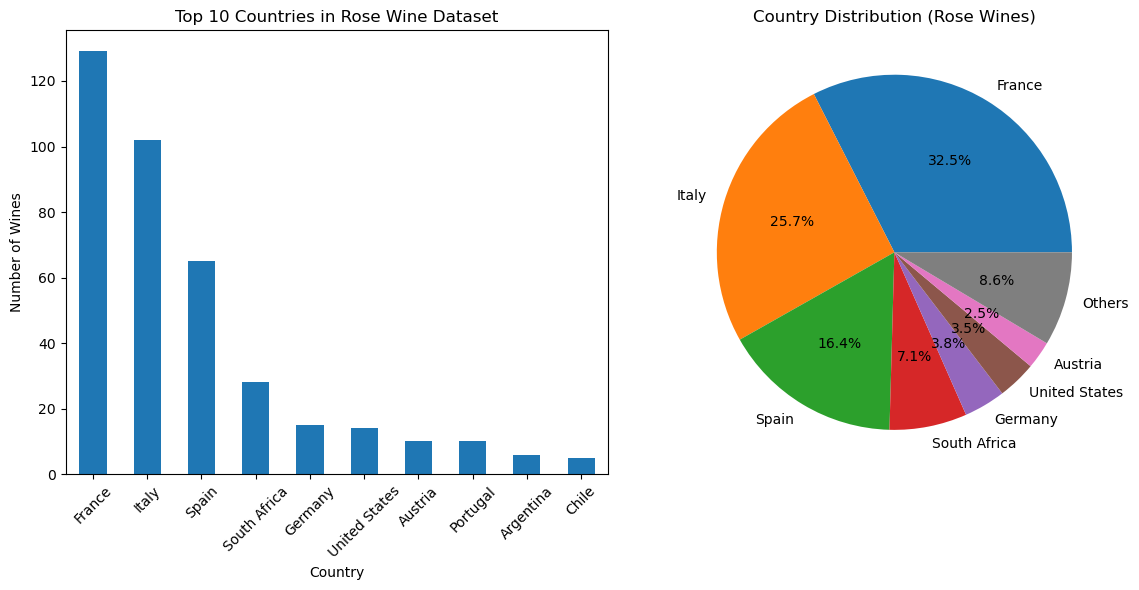

In [56]:
# 1. Country Distribution - Bar Chart
plt.figure(figsize=(12, 6))
country_counts = df_rose_cost['Country'].value_counts()
plt.subplot(1, 2, 1)
country_counts.head(10).plot(kind='bar')
plt.title('Top 10 Countries in Rose Wine Dataset')
plt.xlabel('Country')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)

# 2. Country Distribution - Pie Chart (top 8 + others)
plt.subplot(1, 2, 2)
top_countries = country_counts.head(7)
others = pd.Series([country_counts.tail(-7).sum()], index=['Others'])
pie_data = pd.concat([top_countries, others])
plt.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%')
plt.title('Country Distribution (Rose Wines)')
plt.tight_layout()
plt.show()

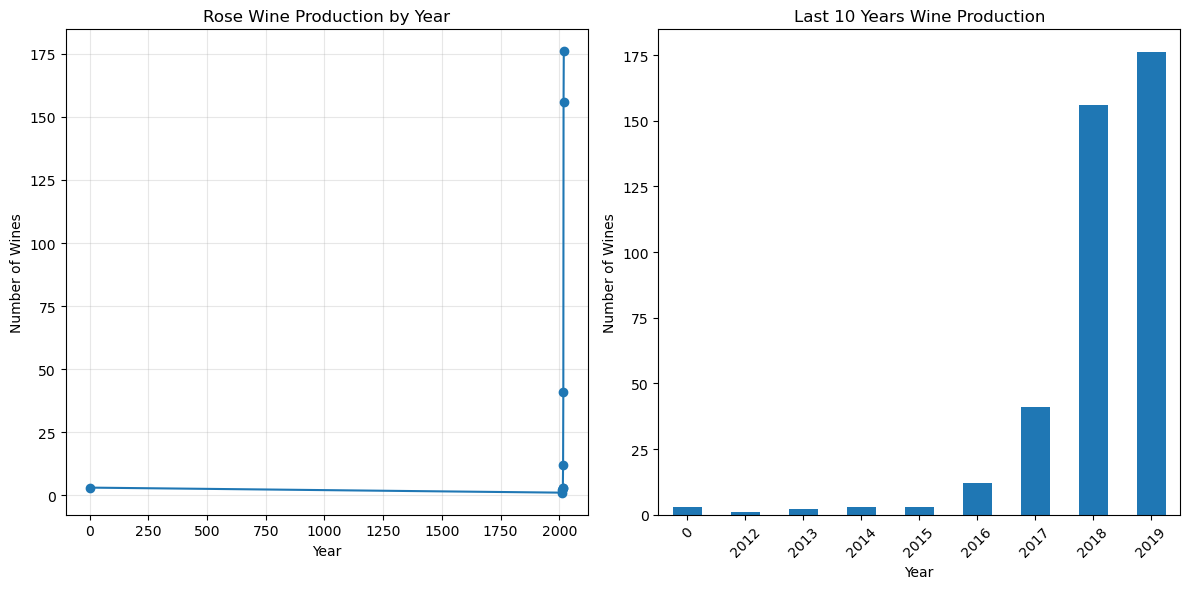

In [57]:
# 3. Vintage Year Distribution
plt.figure(figsize=(12, 6))
year_counts = df_rose_cost['Year'].value_counts().sort_index()

plt.subplot(1, 2, 1)
year_counts.plot(kind='line', marker='o')
plt.title('Rose Wine Production by Year')
plt.xlabel('Year')
plt.ylabel('Number of Wines')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
year_counts.tail(10).plot(kind='bar')
plt.title('Last 10 Years Wine Production')
plt.xlabel('Year')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

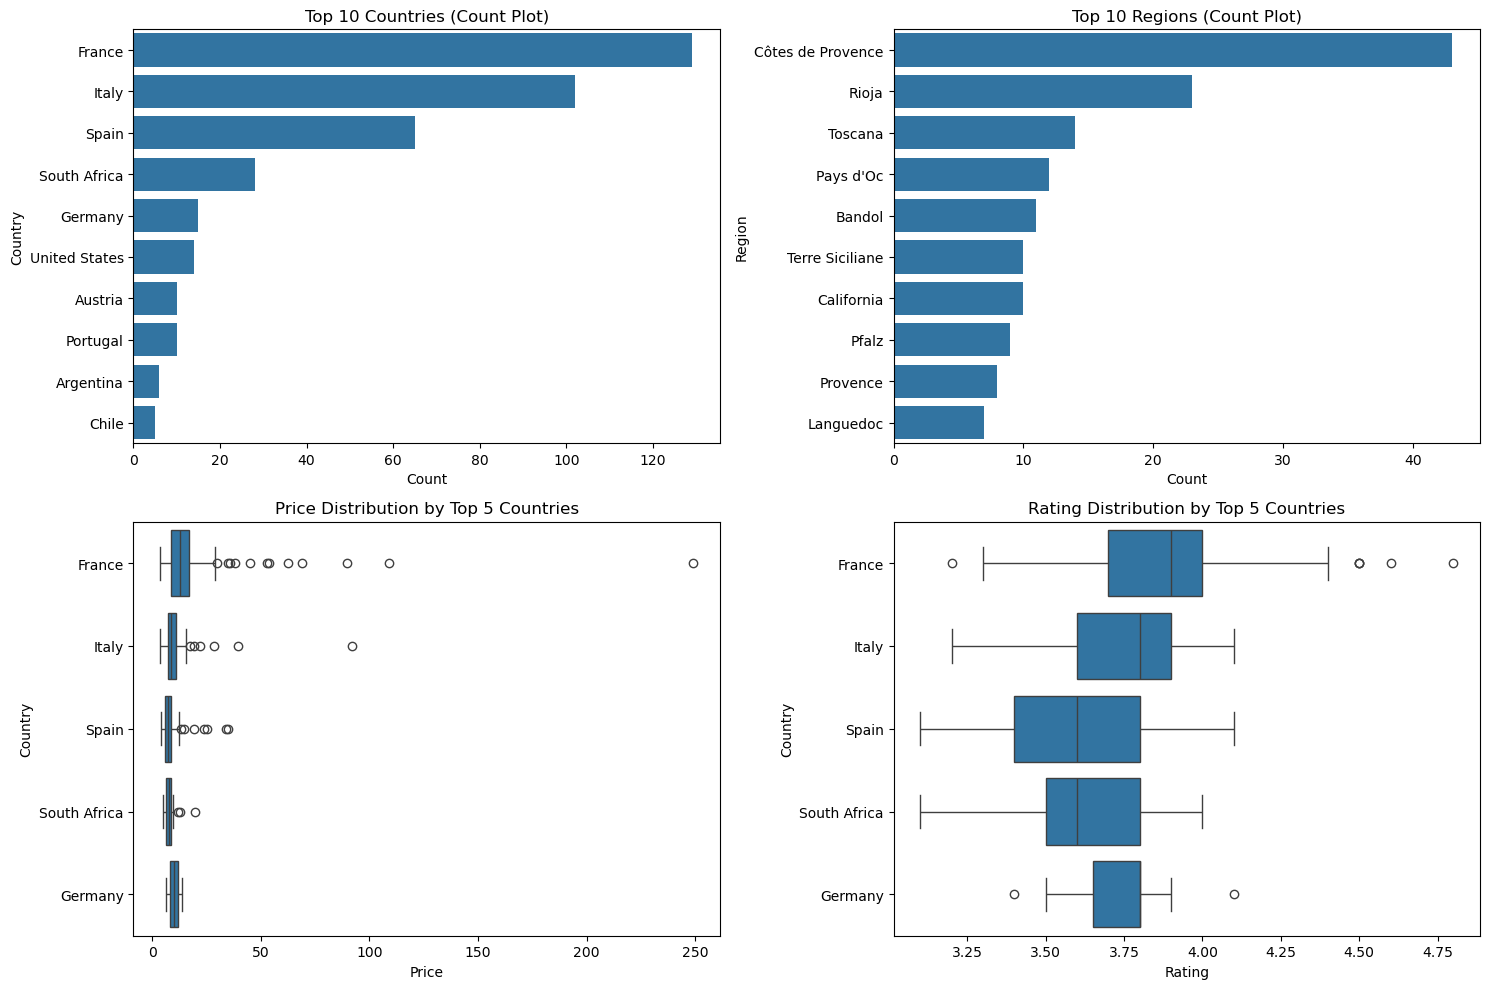

In [58]:
# 4. Using Seaborn for better categorical visualizations
plt.figure(figsize=(15, 10))

# Count plot for countries
plt.subplot(2, 2, 1)
sns.countplot(data=df_rose_cost, y='Country', order=df_rose_cost['Country'].value_counts().head(10).index)
plt.title('Top 10 Countries (Count Plot)')
plt.xlabel('Count')

# Count plot for regions (top 10)
plt.subplot(2, 2, 2)
top_regions = df_rose_cost['Region'].value_counts().head(10).index
sns.countplot(data=df_rose_cost[df_rose_cost['Region'].isin(top_regions)], y='Region', 
              order=top_regions)
plt.title('Top 10 Regions (Count Plot)')
plt.xlabel('Count')

# Box plot: Price by Country (top 5 countries)
plt.subplot(2, 2, 3)
top_5_countries = df_rose_cost['Country'].value_counts().head(5).index
sns.boxplot(data=df_rose_cost[df_rose_cost['Country'].isin(top_5_countries)], 
            y='Country', x='Price', order=top_5_countries)
plt.title('Price Distribution by Top 5 Countries')

# Box plot: Rating by Country (top 5 countries)
plt.subplot(2, 2, 4)
sns.boxplot(data=df_rose_cost[df_rose_cost['Country'].isin(top_5_countries)], 
            y='Country', x='Rating', order=top_5_countries)
plt.title('Rating Distribution by Top 5 Countries')

plt.tight_layout()
plt.show()

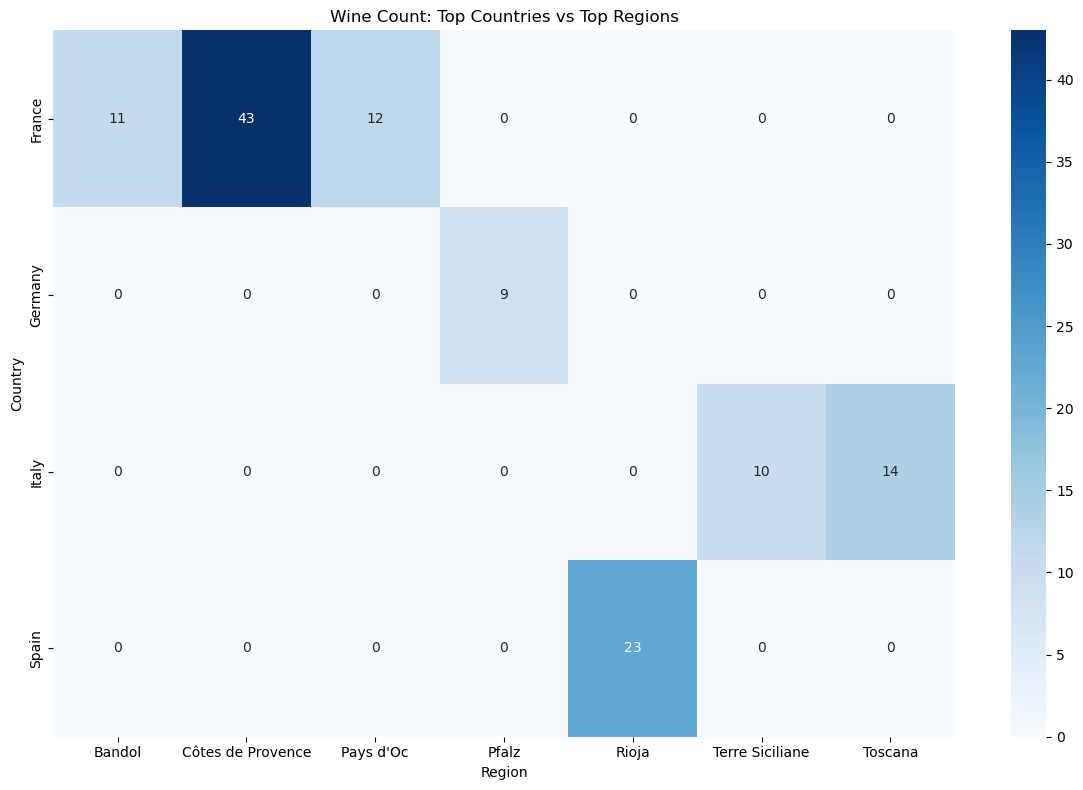

In [59]:
# 5. Relationship between categorical variables - Heatmap
plt.figure(figsize=(12, 8))

# Create a crosstab between Country and Region (top countries and regions only)
top_countries = df_rose_cost['Country'].value_counts().head(5).index
top_regions = df_rose_cost['Region'].value_counts().head(8).index

# Filter data for top countries and regions
filtered_data = df_rose_cost[
    (df_rose_cost['Country'].isin(top_countries)) & 
    (df_rose_cost['Region'].isin(top_regions))
]

if not filtered_data.empty:
    crosstab = pd.crosstab(filtered_data['Country'], filtered_data['Region'])
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
    plt.title('Wine Count: Top Countries vs Top Regions')
    plt.xlabel('Region')
    plt.ylabel('Country')
else:
    print("No overlapping data between top countries and regions")

plt.tight_layout()
plt.show()

In [60]:
# 7. Summary statistics for categorical variables
print("=== CATEGORICAL VARIABLE SUMMARY ===\n")

print("Country Distribution:")
print(df_rose_cost['Country'].value_counts().head(10))
print(f"Total unique countries: {df_rose_cost['Country'].nunique()}")

print("\nRegion Distribution:")
print(df_rose_cost['Region'].value_counts().head(10))
print(f"Total unique regions: {df_rose_cost['Region'].nunique()}")

print("\nWinery Distribution:")
print(df_rose_cost['Winery'].value_counts().head(10))
print(f"Total unique wineries: {df_rose_cost['Winery'].nunique()}")

print("\nYear Distribution:")
print(df_rose_cost['Year'].value_counts().sort_index().tail(10))
print(f"Year range: {df_rose_cost['Year'].min()} - {df_rose_cost['Year'].max()}")

# Check for missing values in categorical columns
print("\nMissing Values in Categorical Columns:")
categorical_cols = ['Name', 'Country', 'Region', 'Winery', 'Year']
for col in categorical_cols:
    missing = df_rose_cost[col].isnull().sum()
    print(f"{col}: {missing} missing values ({missing/len(df_rose_cost)*100:.1f}%)")

=== CATEGORICAL VARIABLE SUMMARY ===

Country Distribution:
Country
France           129
Italy            102
Spain             65
South Africa      28
Germany           15
United States     14
Austria           10
Portugal          10
Argentina          6
Chile              5
Name: count, dtype: int64
Total unique countries: 16

Region Distribution:
Region
Côtes de Provence    43
Rioja                23
Toscana              14
Pays d'Oc            12
Bandol               11
Terre Siciliane      10
California           10
Pfalz                 9
Provence              8
Languedoc             7
Name: count, dtype: int64
Total unique regions: 129

Winery Distribution:
Winery
Château d'Esclans              7
Domaines Ott                   6
Torres                         5
Ramón Bilbao                   4
Protos                         4
Château La Tour de l'Évêque    4
Les Jamelles                   4
Minuty                         4
Mulderbosch                    3
Muga                  

### Sparkling Categorical Data Visualization
Now let's create visualizations specifically for the object-type (categorical) variables in our wine datasets.

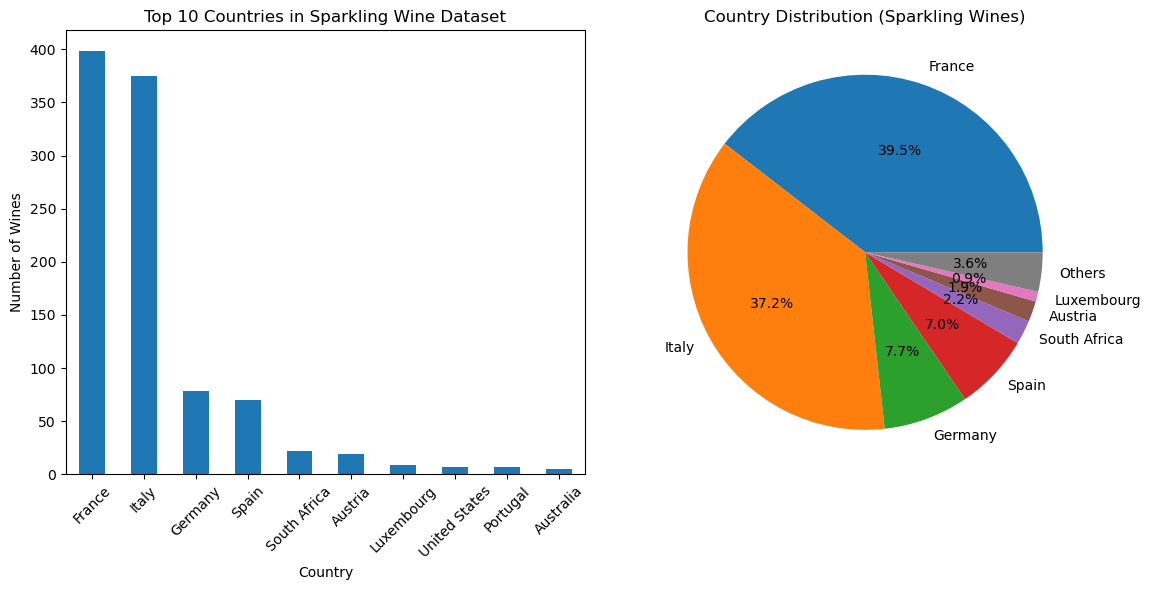

In [61]:
# 1. Country Distribution - Bar Chart
plt.figure(figsize=(12, 6))
country_counts = df_sparkling_cost['Country'].value_counts()
plt.subplot(1, 2, 1)
country_counts.head(10).plot(kind='bar')
plt.title('Top 10 Countries in Sparkling Wine Dataset')
plt.xlabel('Country')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)

# 2. Country Distribution - Pie Chart (top 8 + others)
plt.subplot(1, 2, 2)
top_countries = country_counts.head(7)
others = pd.Series([country_counts.tail(-7).sum()], index=['Others'])
pie_data = pd.concat([top_countries, others])
plt.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%')
plt.title('Country Distribution (Sparkling Wines)')
plt.tight_layout()
plt.show()

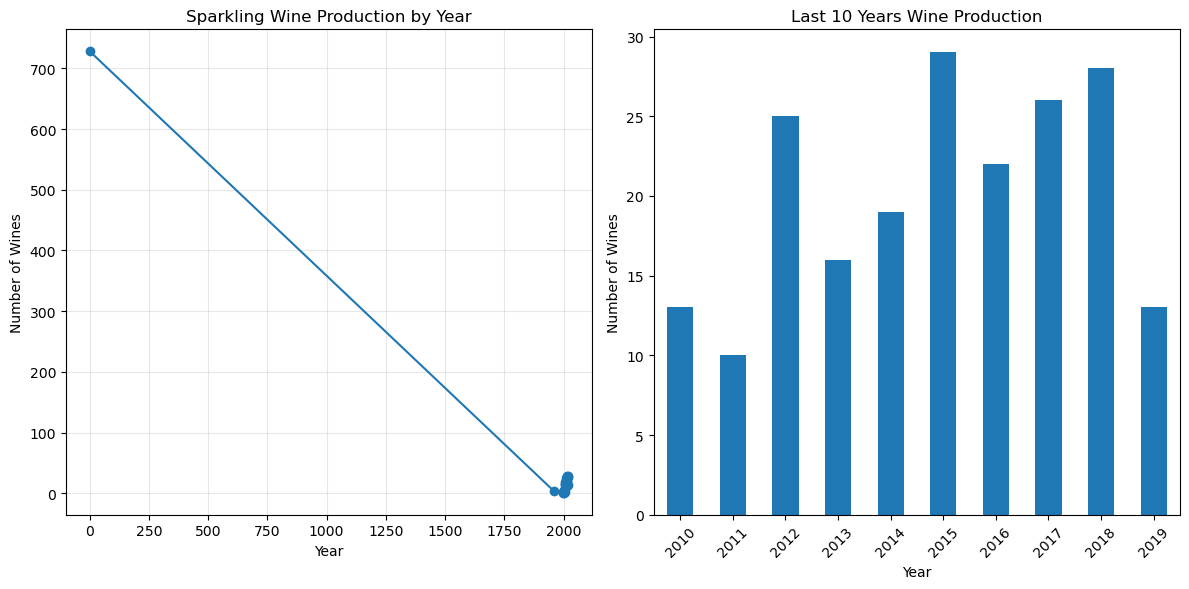

In [62]:
# 3. Vintage Year Distribution
plt.figure(figsize=(12, 6))
year_counts = df_sparkling_cost['Year'].value_counts().sort_index()

plt.subplot(1, 2, 1)
year_counts.plot(kind='line', marker='o')
plt.title('Sparkling Wine Production by Year')
plt.xlabel('Year')
plt.ylabel('Number of Wines')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
year_counts.tail(10).plot(kind='bar')
plt.title('Last 10 Years Wine Production')
plt.xlabel('Year')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

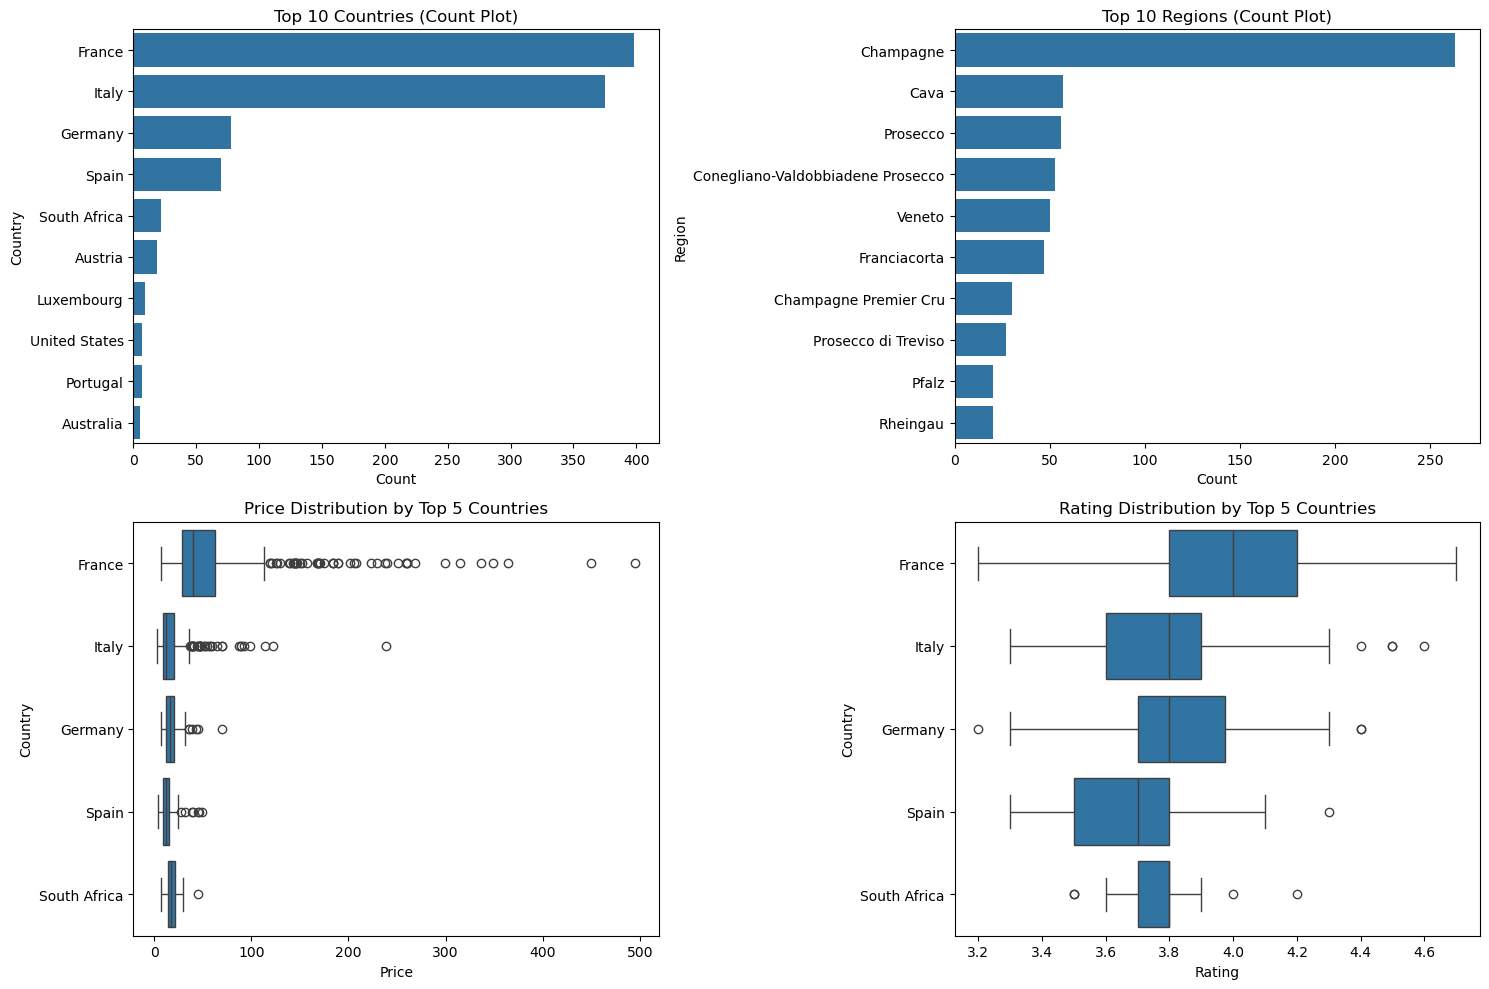

In [63]:
# 4. Using Seaborn for better categorical visualizations
plt.figure(figsize=(15, 10))

# Count plot for countries
plt.subplot(2, 2, 1)
sns.countplot(data=df_sparkling_cost, y='Country', order=df_sparkling_cost['Country'].value_counts().head(10).index)
plt.title('Top 10 Countries (Count Plot)')
plt.xlabel('Count')

# Count plot for regions (top 10)
plt.subplot(2, 2, 2)
top_regions = df_sparkling_cost['Region'].value_counts().head(10).index
sns.countplot(data=df_sparkling_cost[df_sparkling_cost['Region'].isin(top_regions)], y='Region', 
              order=top_regions)
plt.title('Top 10 Regions (Count Plot)')
plt.xlabel('Count')

# Box plot: Price by Country (top 5 countries)
plt.subplot(2, 2, 3)
top_5_countries = df_sparkling_cost['Country'].value_counts().head(5).index
sns.boxplot(data=df_sparkling_cost[df_sparkling_cost['Country'].isin(top_5_countries)], 
            y='Country', x='Price', order=top_5_countries)
plt.title('Price Distribution by Top 5 Countries')

# Box plot: Rating by Country (top 5 countries)
plt.subplot(2, 2, 4)
sns.boxplot(data=df_sparkling_cost[df_sparkling_cost['Country'].isin(top_5_countries)], 
            y='Country', x='Rating', order=top_5_countries)
plt.title('Rating Distribution by Top 5 Countries')

plt.tight_layout()
plt.show()

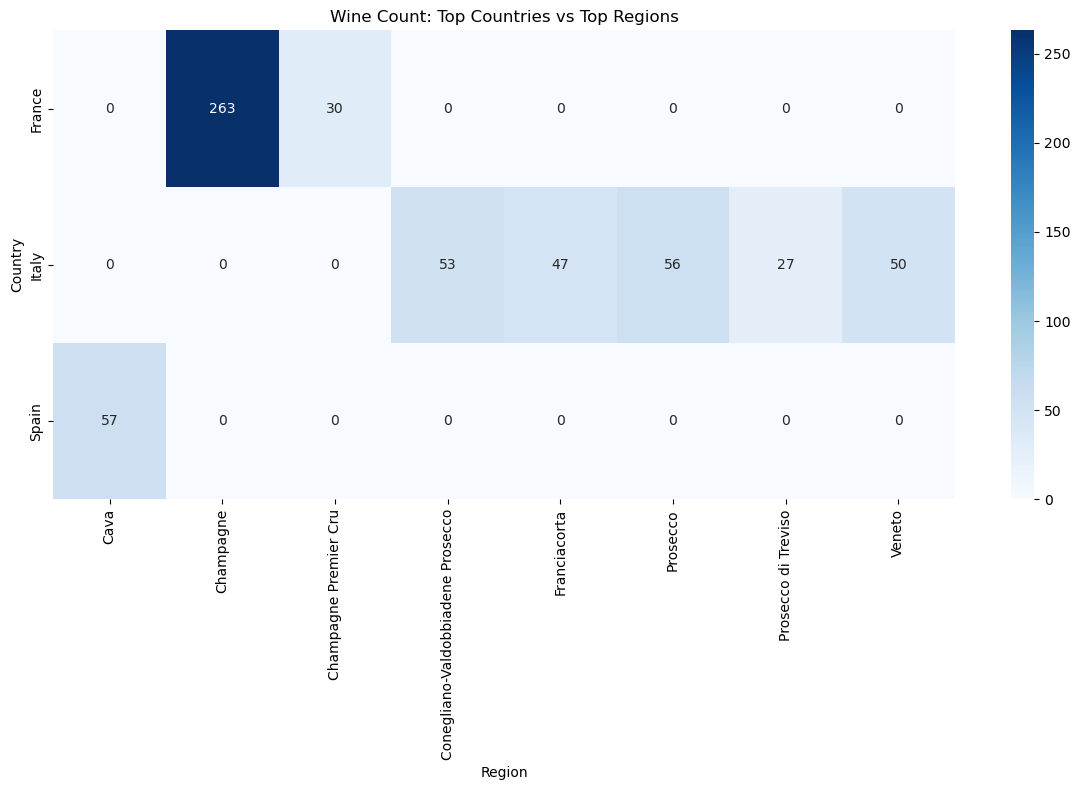

In [64]:
# 5. Relationship between categorical variables - Heatmap
plt.figure(figsize=(12, 8))

# Create a crosstab between Country and Region (top countries and regions only)
top_countries = df_sparkling_cost['Country'].value_counts().head(5).index
top_regions = df_sparkling_cost['Region'].value_counts().head(8).index

# Filter data for top countries and regions
filtered_data = df_sparkling_cost[
    (df_sparkling_cost['Country'].isin(top_countries)) & 
    (df_sparkling_cost['Region'].isin(top_regions))
]

if not filtered_data.empty:
    crosstab = pd.crosstab(filtered_data['Country'], filtered_data['Region'])
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
    plt.title('Wine Count: Top Countries vs Top Regions')
    plt.xlabel('Region')
    plt.ylabel('Country')
else:
    print("No overlapping data between top countries and regions")

plt.tight_layout()
plt.show()

In [65]:
# 7. Summary statistics for categorical variables
print("=== CATEGORICAL VARIABLE SUMMARY ===\n")

print("Country Distribution:")
print(df_sparkling_cost['Country'].value_counts().head(10))
print(f"Total unique countries: {df_sparkling_cost['Country'].nunique()}")

print("\nRegion Distribution:")
print(df_sparkling_cost['Region'].value_counts().head(10))
print(f"Total unique regions: {df_sparkling_cost['Region'].nunique()}")

print("\nWinery Distribution:")
print(df_sparkling_cost['Winery'].value_counts().head(10))
print(f"Total unique wineries: {df_sparkling_cost['Winery'].nunique()}")

print("\nYear Distribution:")
print(df_sparkling_cost['Year'].value_counts().sort_index().tail(10))
print(f"Year range: {df_sparkling_cost['Year'].min()} - {df_sparkling_cost['Year'].max()}")

# Check for missing values in categorical columns
print("\nMissing Values in Categorical Columns:")
categorical_cols = ['Name', 'Country', 'Region', 'Winery', 'Year']
for col in categorical_cols:
    missing = df_sparkling_cost[col].isnull().sum()
    print(f"{col}: {missing} missing values ({missing/len(df_sparkling_cost)*100:.1f}%)")

=== CATEGORICAL VARIABLE SUMMARY ===

Country Distribution:
Country
France           398
Italy            375
Germany           78
Spain             70
South Africa      22
Austria           19
Luxembourg         9
United States      7
Portugal           7
Australia          5
Name: count, dtype: int64
Total unique countries: 16

Region Distribution:
Region
Champagne                            263
Cava                                  57
Prosecco                              56
Conegliano-Valdobbiadene Prosecco     53
Veneto                                50
Franciacorta                          47
Champagne Premier Cru                 30
Prosecco di Treviso                   27
Pfalz                                 20
Rheingau                              20
Name: count, dtype: int64
Total unique regions: 123

Winery Distribution:
Winery
Louis Roederer     18
Bellavista         16
Ferrari            14
Villa Sandi        13
Bruno Paillard     12
Raumland           12
Taittinger       

## Variance Inflation Factor (VIF) Analysis
VIF helps detect multicollinearity between numerical features. A VIF > 10 typically indicates high multicollinearity that may need to be addressed.

In [66]:
# Install required package for VIF calculation
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def calculate_vif(df, numerical_cols):
    """
    Calculate VIF for numerical columns in a dataframe
    """
    # Select only numerical columns and remove any missing values
    data = df[numerical_cols].dropna()
    
    # Standardize the features (recommended for VIF calculation)
    scaler = StandardScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data_scaled.columns
    vif_data["VIF"] = [variance_inflation_factor(data_scaled.values, i) 
                       for i in range(len(data_scaled.columns))]
    
    return vif_data.sort_values('VIF', ascending=False)

In [70]:
# Calculate VIF for Wine Quality datasets (UCI)
print("=== VIF Analysis for Wine Quality Datasets ===\n")

# Red wine quality dataset
red_numerical_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                     'pH', 'sulphates', 'alcohol', 'quality']

print("Red Wine Quality Dataset VIF:")
red_vif = calculate_vif(df_red, red_numerical_cols)
print(red_vif)
print(f"\nFeatures with VIF > 10: {len(red_vif[red_vif['VIF'] > 10])}")
print(f"Features with VIF > 5: {len(red_vif[red_vif['VIF'] > 5])}")

print("\n" + "="*50 + "\n")


=== VIF Analysis for Wine Quality Datasets ===

Red Wine Quality Dataset VIF:
                 Feature       VIF
0          fixed acidity  7.772051
7                density  6.346491
8                     pH  3.339511
10               alcohol  3.238899
2            citric acid  3.131055
6   total sulfur dioxide  2.214467
5    free sulfur dioxide  1.968010
1       volatile acidity  1.879663
3         residual sugar  1.703859
11               quality  1.563848
4              chlorides  1.500591
9              sulphates  1.487286

Features with VIF > 10: 0
Features with VIF > 5: 2




In [71]:
# White wine quality dataset  
white_numerical_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                       'pH', 'sulphates', 'alcohol', 'quality']

print("White Wine Quality Dataset VIF:")
white_vif = calculate_vif(df_white, white_numerical_cols)
print(white_vif)
print(f"\nFeatures with VIF > 10: {len(white_vif[white_vif['VIF'] > 10])}")
print(f"Features with VIF > 5: {len(white_vif[white_vif['VIF'] > 5])}")

White Wine Quality Dataset VIF:
                 Feature        VIF
7                density  28.591234
3         residual sugar  12.947302
10               alcohol   7.807600
0          fixed acidity   2.696863
6   total sulfur dioxide   2.239495
8                     pH   2.215431
5    free sulfur dioxide   1.795035
11               quality   1.392506
4              chlorides   1.236874
1       volatile acidity   1.203769
2            citric acid   1.165228
9              sulphates   1.147761

Features with VIF > 10: 2
Features with VIF > 5: 3


In [72]:
# Calculate VIF for Wine Cost datasets (Kaggle)
print("=== VIF Analysis for Wine Cost Datasets ===\n")

# Numerical columns for cost datasets (including Year after cleaning)
cost_numerical_cols = ['Rating', 'Price', 'Year']

datasets = {
    'Red Wine Cost': df_red_cost,
    'White Wine Cost': df_white_cost, 
    'Rose Wine Cost': df_rose_cost,
    'Sparkling Wine Cost': df_sparkling_cost
}

for name, dataset in datasets.items():
    print(f"{name} Dataset VIF:")
    try:
        vif_result = calculate_vif(dataset, cost_numerical_cols)
        print(vif_result)
        print(f"Features with VIF > 10: {len(vif_result[vif_result['VIF'] > 10])}")
        print(f"Features with VIF > 5: {len(vif_result[vif_result['VIF'] > 5])}")
    except Exception as e:
        print(f"Error calculating VIF: {e}")
    print("\n" + "="*40)

=== VIF Analysis for Wine Cost Datasets ===

Red Wine Cost Dataset VIF:
  Feature       VIF
0  Rating  1.256942
1   Price  1.255422
2    Year  1.001523
Features with VIF > 10: 0
Features with VIF > 5: 0

White Wine Cost Dataset VIF:
  Feature       VIF
0  Rating  1.280780
1   Price  1.274473
2    Year  1.005748
Features with VIF > 10: 0
Features with VIF > 5: 0

Rose Wine Cost Dataset VIF:
  Feature       VIF
1   Price  1.231864
0  Rating  1.229909
2    Year  1.001809
Features with VIF > 10: 0
Features with VIF > 5: 0

Sparkling Wine Cost Dataset VIF:
  Feature       VIF
0  Rating  2.085925
1   Price  1.929187
2    Year  1.223608
Features with VIF > 10: 0
Features with VIF > 5: 0



In [80]:
# Calculate VIF for Merged Wine Cost Dataset
print("=== VIF Analysis for Merged Wine Cost Dataset ===\n")

# Check the columns in merged cost dataset
print(f"Merged cost dataset shape: {df_merged_cost.shape}")
print(f"Columns: {list(df_merged_cost.columns)}")

# Define numerical columns for the merged cost dataset
merged_cost_numerical_cols = ['Rating', 'NumberOfRatings', 'Year', 
                              'is_red_wine', 'is_white_wine', 'is_rose_wine', 'is_sparkling_wine']

# Check which columns actually exist
available_cols = [col for col in merged_cost_numerical_cols if col in df_merged_cost.columns]
print(f"\nAvailable numerical columns for VIF analysis: {available_cols}")

try:
    print("Merged Wine Cost Dataset VIF:")
    merged_cost_vif = calculate_vif(df_merged_cost, available_cols)
    print(merged_cost_vif)
    print(f"\nFeatures with VIF > 10: {len(merged_cost_vif[merged_cost_vif['VIF'] > 10])}")
    print(f"Features with VIF > 5: {len(merged_cost_vif[merged_cost_vif['VIF'] > 5])}")
    
    # Identify high VIF features
    high_vif_features = merged_cost_vif[merged_cost_vif['VIF'] > 10]['Feature'].tolist()
    if high_vif_features:
        print(f"\nHigh VIF features (>10): {high_vif_features}")
    
    moderate_vif_features = merged_cost_vif[(merged_cost_vif['VIF'] > 5) & (merged_cost_vif['VIF'] <= 10)]['Feature'].tolist()
    if moderate_vif_features:
        print(f"Moderate VIF features (5-10): {moderate_vif_features}")
        
except Exception as e:
    print(f"Error calculating VIF for merged cost dataset: {e}")
    print("\nTrying with a subset of numerical columns...")
    
    # Try with just the core numerical columns
    core_numerical_cols = ['Rating', 'NumberOfRatings', 'Price']
    available_core_cols = [col for col in core_numerical_cols if col in df_merged_cost.columns]
    
    if len(available_core_cols) >= 2:
        try:
            print(f"VIF analysis with core columns: {available_core_cols}")
            merged_cost_vif_core = calculate_vif(df_merged_cost, available_core_cols)
            print(merged_cost_vif_core)
        except Exception as e2:
            print(f"Error with core columns: {e2}")

print("\n" + "="*60)

=== VIF Analysis for Merged Wine Cost Dataset ===

Merged cost dataset shape: (13834, 10)
Columns: ['Name', 'Country', 'Region', 'Winery', 'Rating', 'Price', 'Year', 'is_red_wine', 'is_white_wine', 'is_rose_wine']

Available numerical columns for VIF analysis: ['Rating', 'Year', 'is_red_wine', 'is_white_wine', 'is_rose_wine']
Merged Wine Cost Dataset VIF:
         Feature        VIF
2    is_red_wine  11.437870
3  is_white_wine  10.171520
1           Year   3.276863
4   is_rose_wine   2.298968
0         Rating   1.027152

Features with VIF > 10: 2
Features with VIF > 5: 2

High VIF features (>10): ['is_red_wine', 'is_white_wine']



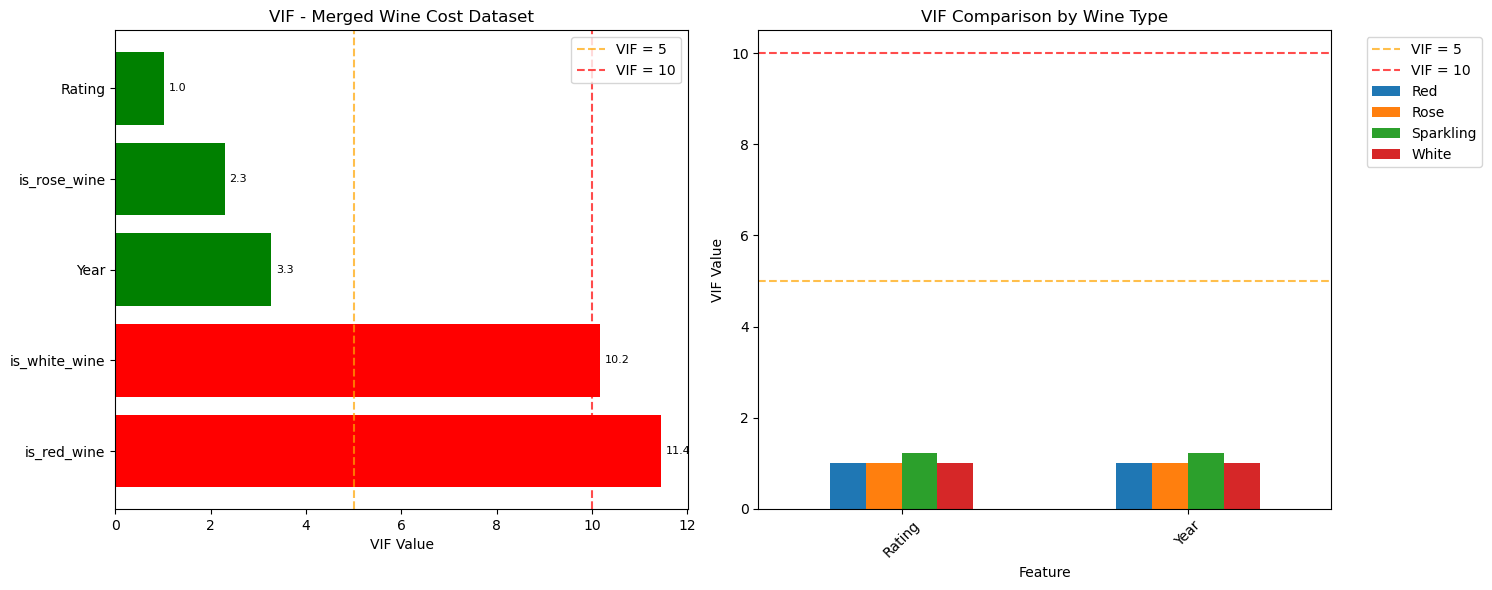


=== Merged Cost Dataset VIF Summary ===
Total features analyzed: 5
Features with VIF > 10 (high multicollinearity): 2
Features with VIF 5-10 (moderate multicollinearity): 0
Features with VIF ≤ 5 (acceptable): 3


In [81]:
# Visualize VIF results for merged cost dataset
plt.figure(figsize=(15, 6))

try:
    # Plot VIF for merged cost dataset
    plt.subplot(1, 2, 1)
    if 'merged_cost_vif' in locals():
        merged_cost_vif_plot = merged_cost_vif.copy()
        colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in merged_cost_vif_plot['VIF']]
        bars = plt.barh(merged_cost_vif_plot['Feature'], merged_cost_vif_plot['VIF'], color=colors)
        plt.xlabel('VIF Value')
        plt.title('VIF - Merged Wine Cost Dataset')
        plt.axvline(x=5, color='orange', linestyle='--', alpha=0.7, label='VIF = 5')
        plt.axvline(x=10, color='red', linestyle='--', alpha=0.7, label='VIF = 10')
        plt.legend()
        
        # Add value labels on bars
        for bar in bars:
            width = bar.get_width()
            if width != float('inf') and not np.isnan(width):  # Skip infinite/NaN values
                plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
                         f'{width:.1f}', ha='left', va='center', fontsize=8)
    else:
        plt.text(0.5, 0.5, 'VIF analysis failed\nfor merged dataset', 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('VIF - Merged Wine Cost Dataset (Error)')

    # Compare VIF across individual wine type datasets
    plt.subplot(1, 2, 2)
    wine_types = ['Red', 'White', 'Rose', 'Sparkling']
    datasets_for_comparison = [df_red_cost, df_white_cost, df_rose_cost, df_sparkling_cost]
    comparison_vifs = []
    
    for wine_type, dataset in zip(wine_types, datasets_for_comparison):
        try:
            core_cols = ['Rating', 'NumberOfRatings', 'Year']
            available_cols = [col for col in core_cols if col in dataset.columns]
            if len(available_cols) >= 2:
                vif_result = calculate_vif(dataset, available_cols)
                vif_result['Wine_Type'] = wine_type
                comparison_vifs.append(vif_result)
        except:
            continue
    
    if comparison_vifs:
        comparison_df = pd.concat(comparison_vifs, ignore_index=True)
        pivot_comparison = comparison_df.pivot(index='Feature', columns='Wine_Type', values='VIF')
        pivot_comparison.plot(kind='bar', ax=plt.gca())
        plt.axhline(y=5, color='orange', linestyle='--', alpha=0.7, label='VIF = 5')
        plt.axhline(y=10, color='red', linestyle='--', alpha=0.7, label='VIF = 10')
        plt.title('VIF Comparison by Wine Type')
        plt.ylabel('VIF Value')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)
    
except Exception as e:
    plt.text(0.5, 0.5, f'Visualization error: {str(e)}', 
            ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

# Summary of VIF findings for merged cost dataset
print("\n=== Merged Cost Dataset VIF Summary ===")
if 'merged_cost_vif' in locals():
    print(f"Total features analyzed: {len(merged_cost_vif)}")
    print(f"Features with VIF > 10 (high multicollinearity): {len(merged_cost_vif[merged_cost_vif['VIF'] > 10])}")
    print(f"Features with VIF 5-10 (moderate multicollinearity): {len(merged_cost_vif[(merged_cost_vif['VIF'] > 5) & (merged_cost_vif['VIF'] <= 10)])}")
    print(f"Features with VIF ≤ 5 (acceptable): {len(merged_cost_vif[merged_cost_vif['VIF'] <= 5])}")
    
    # Check for perfect multicollinearity in wine type indicators
    wine_type_high_vif = merged_cost_vif[
        (merged_cost_vif['Feature'].str.contains('is_.*_wine')) & 
        (merged_cost_vif['VIF'] > 50)
    ]
    if not wine_type_high_vif.empty:
        print(f"\n⚠️ Warning: Perfect multicollinearity detected in wine type indicators:")
        print(wine_type_high_vif[['Feature', 'VIF']])
        print("Consider removing redundant indicators (use n-1 indicators for n categories)")
else:
    print("VIF analysis could not be completed for the merged cost dataset")

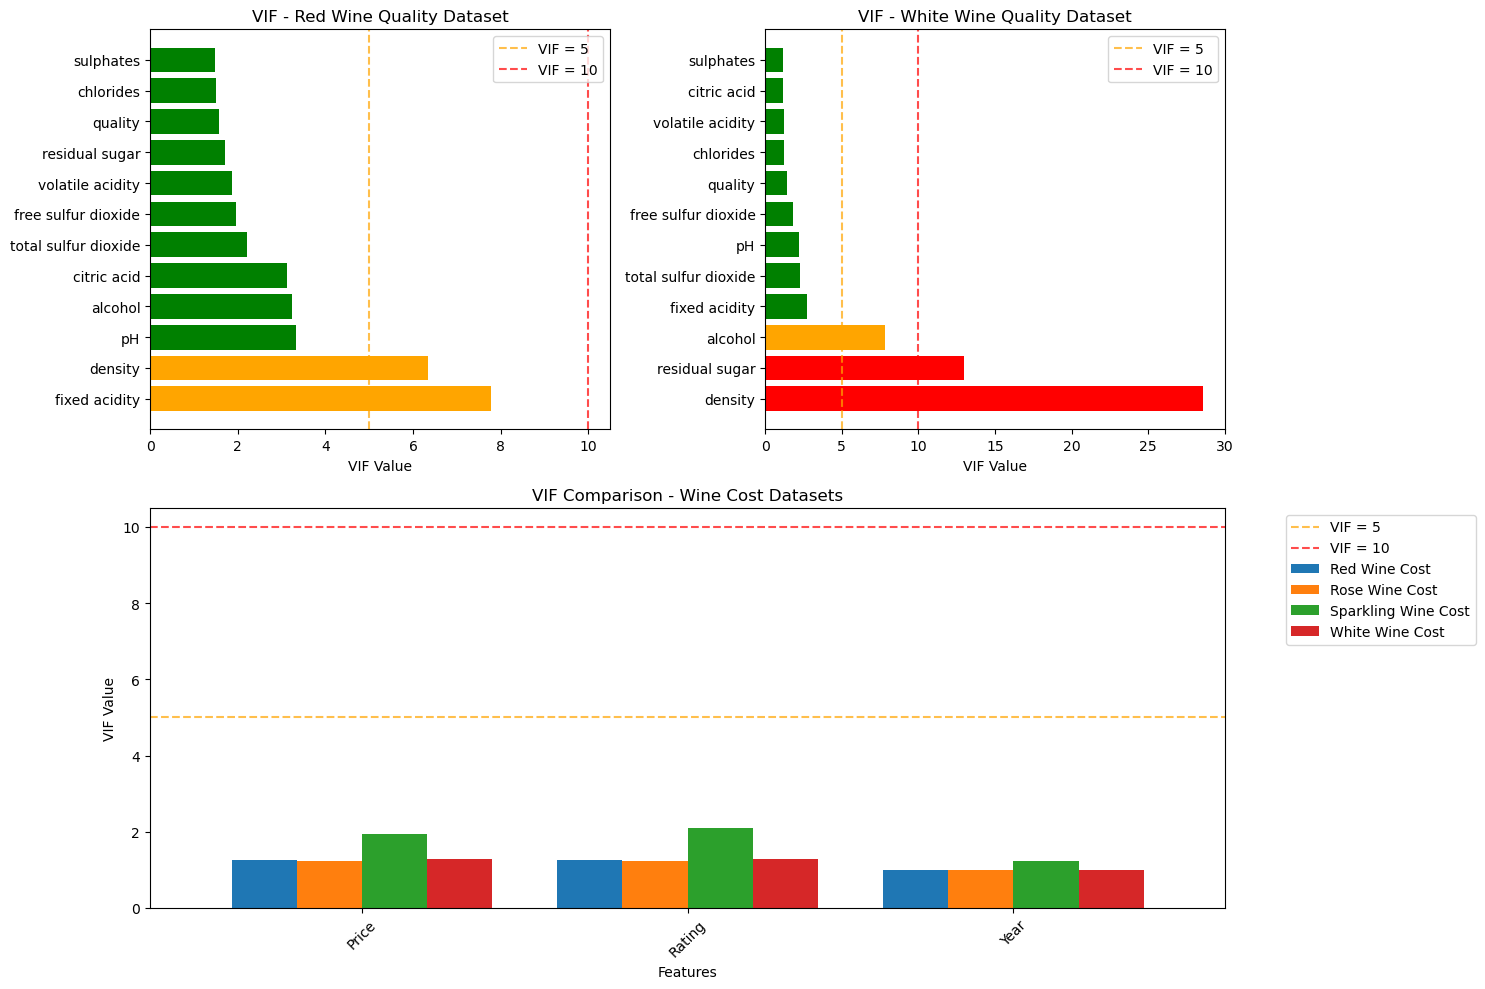

In [75]:
# Visualize VIF results
plt.figure(figsize=(15, 10))

# Plot VIF for red wine quality dataset
plt.subplot(2, 2, 1)
red_vif_plot = red_vif.copy()
colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in red_vif_plot['VIF']]
plt.barh(red_vif_plot['Feature'], red_vif_plot['VIF'], color=colors)
plt.xlabel('VIF Value')
plt.title('VIF - Red Wine Quality Dataset')
plt.axvline(x=5, color='orange', linestyle='--', alpha=0.7, label='VIF = 5')
plt.axvline(x=10, color='red', linestyle='--', alpha=0.7, label='VIF = 10')
plt.legend()

# Plot VIF for white wine quality dataset
plt.subplot(2, 2, 2)
white_vif_plot = white_vif.copy()
colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in white_vif_plot['VIF']]
plt.barh(white_vif_plot['Feature'], white_vif_plot['VIF'], color=colors)
plt.xlabel('VIF Value')
plt.title('VIF - White Wine Quality Dataset')
plt.axvline(x=5, color='orange', linestyle='--', alpha=0.7, label='VIF = 5')
plt.axvline(x=10, color='red', linestyle='--', alpha=0.7, label='VIF = 10')
plt.legend()

# Plot VIF comparison for cost datasets
plt.subplot(2, 1, 2)
cost_vif_comparison = pd.DataFrame()
for name, dataset in datasets.items():
    try:
        vif_result = calculate_vif(dataset, cost_numerical_cols)
        vif_result['Dataset'] = name
        cost_vif_comparison = pd.concat([cost_vif_comparison, vif_result])
    except:
        continue

if not cost_vif_comparison.empty:
    pivot_data = cost_vif_comparison.pivot(index='Feature', columns='Dataset', values='VIF')
    pivot_data.plot(kind='bar', ax=plt.gca(), width=0.8)
    plt.axhline(y=5, color='orange', linestyle='--', alpha=0.7, label='VIF = 5')
    plt.axhline(y=10, color='red', linestyle='--', alpha=0.7, label='VIF = 10')
    plt.title('VIF Comparison - Wine Cost Datasets')
    plt.xlabel('Features')
    plt.ylabel('VIF Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [76]:
# VIF of Merged Quality datasets 
print("=== VIF Analysis for Merged Wine Quality Dataset ===\n")

# Create copies of the datasets and add wine type indicators
df_red_copy = df_red.copy()
df_white_copy = df_white.copy()

# Add wine type column
df_red_copy['wine_type'] = 'red'
df_white_copy['wine_type'] = 'white'

# Merge the datasets
df_merged = pd.concat([df_red_copy, df_white_copy], ignore_index=True)

print(f"Merged dataset shape: {df_merged.shape}")
print(f"Red wine samples: {len(df_red_copy)}")
print(f"White wine samples: {len(df_white_copy)}")
print(f"Total samples: {len(df_merged)}")

# Create one-hot encoded variables for wine type
# Wine can either be RED or WHITE, so we only need one indicator variable
df_merged['is_red_wine'] = (df_merged['wine_type'] == 'red').astype(int)
# df_merged['is_white_wine'] = (df_merged['wine_type'] == 'white').astype(int)

print("\nWine type distribution:")
print(df_merged['wine_type'].value_counts())
print("\nOne-hot encoded variables:")
print("is_red_wine sum:", df_merged['is_red_wine'].sum())
# print("is_white_wine sum:", df_merged['is_white_wine'].sum())

# Define numerical columns including the new one-hot encoded variables
merged_numerical_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                        'pH', 'sulphates', 'alcohol', 'is_red_wine']

# Calculate VIF for merged dataset
print("\nMerged Wine Quality Dataset VIF (with one-hot encoded wine types):")
merged_vif = calculate_vif(df_merged, merged_numerical_cols)
print(merged_vif)
print(f"\nFeatures with VIF > 10: {len(merged_vif[merged_vif['VIF'] > 10])}")
print(f"Features with VIF > 5: {len(merged_vif[merged_vif['VIF'] > 5])}")

# Also calculate without the redundant one-hot variable (keeping only is_red_wine)
merged_numerical_cols_single = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                               'pH', 'sulphates', 'alcohol', 'is_red_wine']

print("\n" + "="*60)
print("Merged Dataset VIF (with single wine type indicator - is_red_wine only):")
merged_vif_single = calculate_vif(df_merged, merged_numerical_cols_single)
print(merged_vif_single)
print(f"\nFeatures with VIF > 10: {len(merged_vif_single[merged_vif_single['VIF'] > 10])}")
print(f"Features with VIF > 5: {len(merged_vif_single[merged_vif_single['VIF'] > 5])}")



=== VIF Analysis for Merged Wine Quality Dataset ===

Merged dataset shape: (6497, 13)
Red wine samples: 1599
White wine samples: 4898
Total samples: 6497

Wine type distribution:
wine_type
white    4898
red      1599
Name: count, dtype: int64

One-hot encoded variables:
is_red_wine sum: 1599

Merged Wine Quality Dataset VIF (with one-hot encoded wine types):
                 Feature        VIF
7                density  22.337223
3         residual sugar   9.634653
11           is_red_wine   7.224467
10               alcohol   5.616857
0          fixed acidity   5.048348
6   total sulfur dioxide   4.045899
8                     pH   2.563776
5    free sulfur dioxide   2.235693
1       volatile acidity   2.168159
4              chlorides   1.659342
2            citric acid   1.622151
9              sulphates   1.555807

Features with VIF > 10: 1
Features with VIF > 5: 5

Merged Dataset VIF (with single wine type indicator - is_red_wine only):
                 Feature        VIF
7       

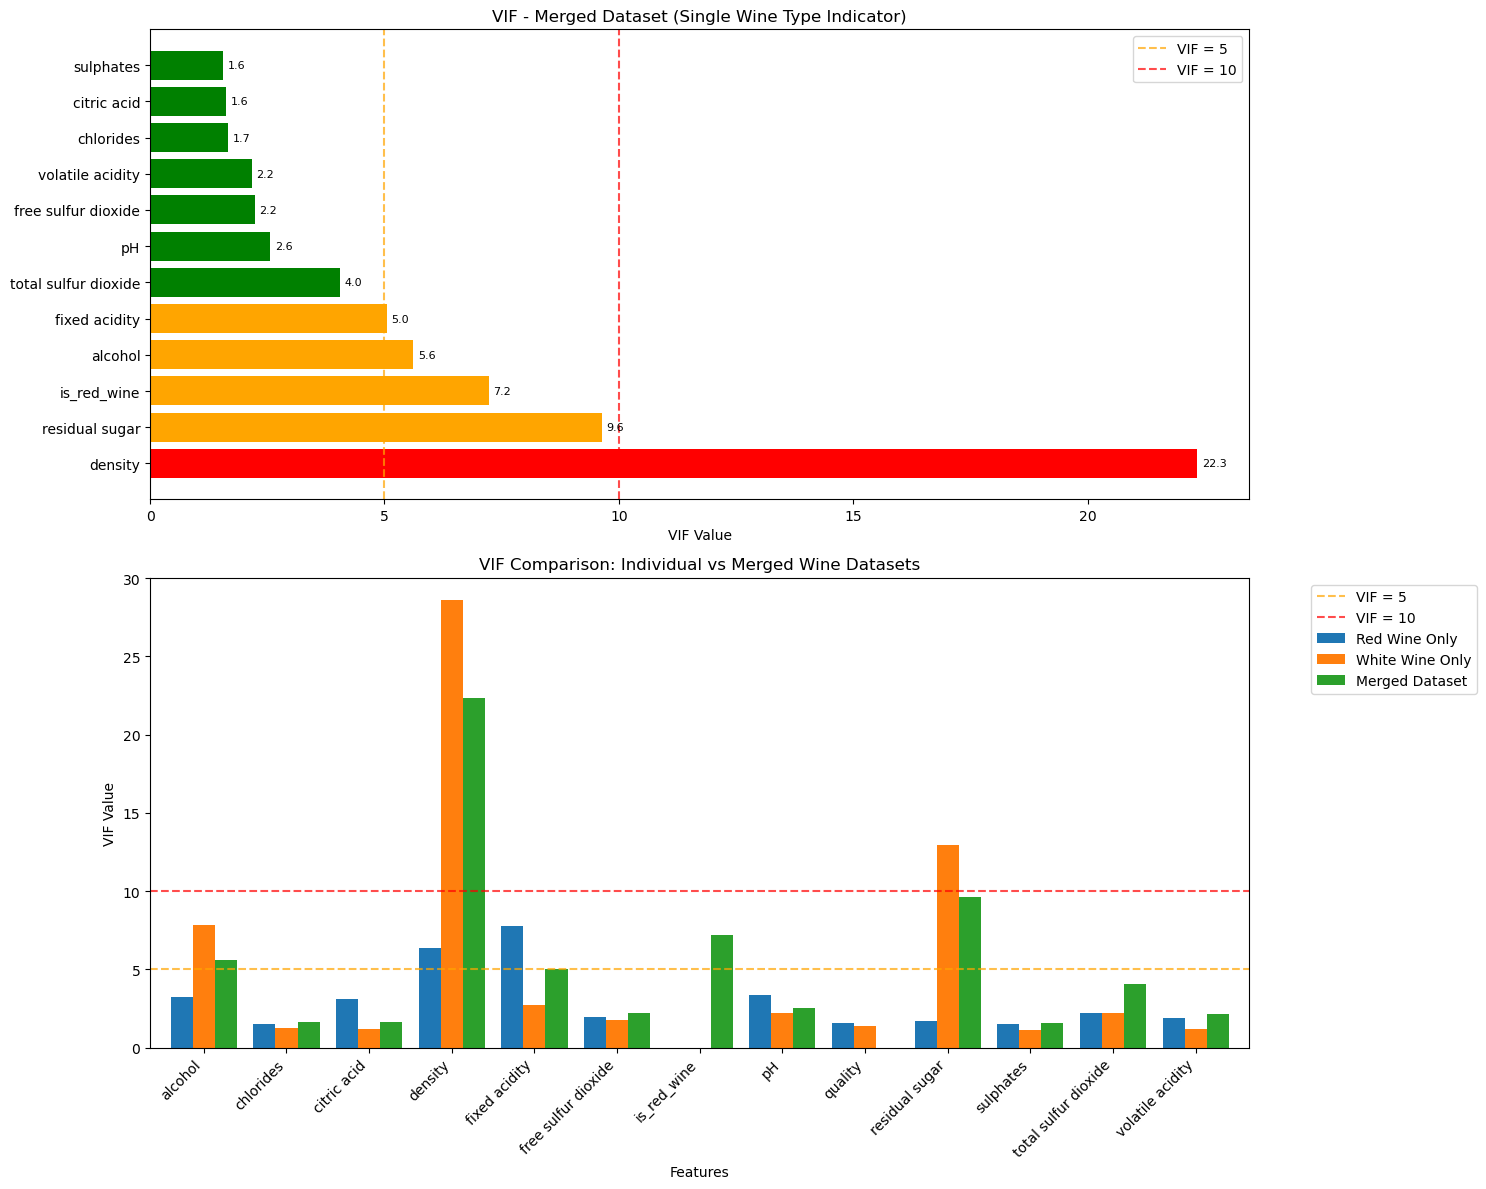


=== VIF Changes Summary ===
VIF differences when merging datasets (Merged - Individual Average):
fixed acidity       :  -0.19 (Individual avg:  5.23, Merged:  5.05)
density             :  +4.87 (Individual avg: 17.47, Merged: 22.34)
pH                  :  -0.21 (Individual avg:  2.78, Merged:  2.56)
alcohol             :  +0.09 (Individual avg:  5.52, Merged:  5.62)
citric acid         :  -0.53 (Individual avg:  2.15, Merged:  1.62)
total sulfur dioxide:  +1.82 (Individual avg:  2.23, Merged:  4.05)
free sulfur dioxide :  +0.35 (Individual avg:  1.88, Merged:  2.24)
volatile acidity    :  +0.63 (Individual avg:  1.54, Merged:  2.17)
residual sugar      :  +2.31 (Individual avg:  7.33, Merged:  9.63)
chlorides           :  +0.29 (Individual avg:  1.37, Merged:  1.66)
sulphates           :  +0.24 (Individual avg:  1.32, Merged:  1.56)

Wine type indicator VIF: 7.22


In [77]:
# Visualize VIF results for merged dataset
plt.figure(figsize=(15, 12))

# Plot VIF for merged dataset (single wine type indicator)
plt.subplot(2, 1, 1)
merged_vif_plot = merged_vif.copy()
colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in merged_vif_plot['VIF']]
bars = plt.barh(merged_vif_plot['Feature'], merged_vif_plot['VIF'], color=colors)
plt.xlabel('VIF Value')
plt.title('VIF - Merged Dataset (Single Wine Type Indicator)')
plt.axvline(x=5, color='orange', linestyle='--', alpha=0.7, label='VIF = 5')
plt.axvline(x=10, color='red', linestyle='--', alpha=0.7, label='VIF = 10')
plt.legend()

# Add value labels on bars for readability
for bar in bars:
    width = bar.get_width()
    if width != float('inf'):  # Skip infinite values
        plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
                 f'{width:.1f}', ha='left', va='center', fontsize=8)

# Compare VIF values: individual vs merged datasets
plt.subplot(2, 1, 2)
comparison_data = {
    'Red Wine Only': red_vif.set_index('Feature')['VIF'],
    'White Wine Only': white_vif.set_index('Feature')['VIF'],
    'Merged Dataset': merged_vif_single.set_index('Feature')['VIF']
}

# Create comparison dataframe
comparison_df = pd.DataFrame(comparison_data).fillna(0)
comparison_df.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.axhline(y=5, color='orange', linestyle='--', alpha=0.7, label='VIF = 5')
plt.axhline(y=10, color='red', linestyle='--', alpha=0.7, label='VIF = 10')
plt.title('VIF Comparison: Individual vs Merged Wine Datasets')
plt.xlabel('Features')
plt.ylabel('VIF Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print summary of VIF changes when merging datasets
print("\n=== VIF Changes Summary ===")
print("VIF differences when merging datasets (Merged - Individual Average):")
merged_vif_dict = merged_vif_single.set_index('Feature')['VIF'].to_dict()
red_vif_dict = red_vif.set_index('Feature')['VIF'].to_dict()
white_vif_dict = white_vif.set_index('Feature')['VIF'].to_dict()

for feature in red_vif_dict.keys():
    if feature in merged_vif_dict:
        individual_avg = (red_vif_dict[feature] + white_vif_dict[feature]) / 2
        merged_val = merged_vif_dict[feature]
        difference = merged_val - individual_avg
        print(f"{feature:20s}: {difference:+6.2f} (Individual avg: {individual_avg:5.2f}, Merged: {merged_val:5.2f})")

# Show the new wine type indicator VIF
if 'is_red_wine' in merged_vif_dict:
    print(f"\nWine type indicator VIF: {merged_vif_dict['is_red_wine']:.2f}")


In [83]:
# Perform iterative feature elimination based on VIF
print("\n=== Iterative Feature Elimination Based on VIF ===\n")

# Remove highest VIF, recalculate VIF, repeat until all VIFs are acceptable
def iterative_vif_elimination(df, numerical_cols, threshold=10):
    features = numerical_cols.copy()
    iteration = 1
    
    while True:
        vif_df = calculate_vif(df, features)
        max_vif = vif_df['VIF'].max()
        
        print(f"Iteration {iteration}: Max VIF = {max_vif:.2f}")
        
        if max_vif <= threshold:
            print("All features have acceptable VIF.")
            break
        
        # Identify feature with highest VIF
        feature_to_remove = vif_df.loc[vif_df['VIF'] == max_vif, 'Feature'].values[0]
        print(f"Removing feature '{feature_to_remove}' with VIF = {max_vif:.2f}\n")
        
        features.remove(feature_to_remove)
        iteration += 1
    
    return features, vif_df

# Cost dataset numerical columns
cost_numerical_cols_full = ['Rating', 'is_rose_wine', 'is_white_wine', 'is_red_wine', 'Year']
                            
cost_features_after_elimination, final_vif_cost = iterative_vif_elimination(
    df_merged_cost, cost_numerical_cols_full, threshold=5)

print(f"Final selected features for cost dataset: {cost_features_after_elimination}\n")
print(f"Final VIF:\n{final_vif_cost}\n")

# Quality dataset numerical columns
quality_numerical_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                        'pH', 'sulphates', 'alcohol', 'is_red_wine']
quality_features_after_elimination, final_quality_vif = iterative_vif_elimination(
    df_merged, quality_numerical_cols, threshold=5)

print(f"Final selected features for quality dataset: {quality_features_after_elimination}\n")
print(f"Final VIF:\n{final_quality_vif}\n")


=== Iterative Feature Elimination Based on VIF ===

Iteration 1: Max VIF = 11.44
Removing feature 'is_red_wine' with VIF = 11.44

Iteration 2: Max VIF = 1.05
All features have acceptable VIF.
Final selected features for cost dataset: ['Rating', 'is_rose_wine', 'is_white_wine', 'Year']

Final VIF:
         Feature       VIF
2  is_white_wine  1.048053
3           Year  1.028133
1   is_rose_wine  1.021599
0         Rating  1.020895

Iteration 1: Max VIF = 22.34
Removing feature 'density' with VIF = 22.34

Iteration 2: Max VIF = 5.15
Removing feature 'is_red_wine' with VIF = 5.15

Iteration 3: Max VIF = 2.84
All features have acceptable VIF.
Final selected features for quality dataset: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']

Final VIF:
                Feature       VIF
6  total sulfur dioxide  2.843819
5   free sulfur dioxide  2.135374
0         fixed acidity  1.783515